# Домашнее задание № 1

Вам необходимо провести анализ и подготовить данные.

# Исходные данные

Ознакомьтесь с данными в [источнике](https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv):

Если вкратце, то у вас есть 29 параметров и одна целевая переменная G3.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    GroupKFold,
    StratifiedKFold,
    cross_val_predict,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelBinarizer,
    LabelEncoder,
    RobustScaler,
    StandardScaler,
)
from sklearn.svm import LinearSVR

In [895]:
# Читаем данные

X_train = pd.read_csv("train_features_with_answers.csv")

In [896]:
# Про характеристики прочитайте в источнике

X_train.head(5)
X_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')

# Часть 1. Визуальный анализ данных (Exploratory Data Analysis)

Перед тем, как приступать к построению алгоритмов, необходимо понять данные, с которыми требуется работать. Для этого в подходах к построению алгоритмов машинного обучения выделят специальный этап - Разведочный анализ данных или Exploratory Data Analysis (EDA). EDA в себя включает все те, что касается описания данных: визуализацию, интерпретацию и анализ.

Прежде всего сделаем визуализацию данных для того, чтобы оценить диапазоны значений и виды их распределений.

Постройте для приведенных ниже характеристик следующие виды графиков:
- Гистограммы;
- Круговые диаграмм;
- Графики;
- Таблицы;
- 3D диаграммы.

Выберите наиболее подходящий тип графика для каждой характеристки.

__Основной критерий оценивания__ - читаемость и интерпретируемость данных.

## Характеристика: "Sex"

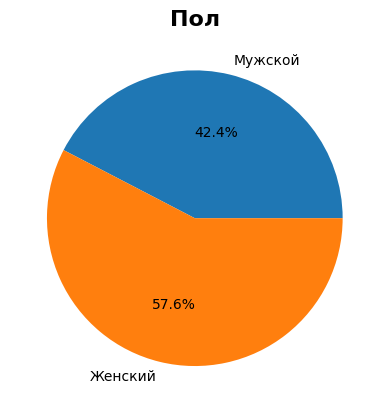

In [897]:
male = X_train[X_train["sex"] == "M"].shape[0]
female = X_train[X_train["sex"] == "F"].shape[0]

plt.pie([male, female], labels=["Мужской", "Женский"], autopct="%1.1f%%")
plt.title(
    "Пол",
    fontweight="bold",
    fontsize=16,
)
plt.show()

## Характеристика: "Age"

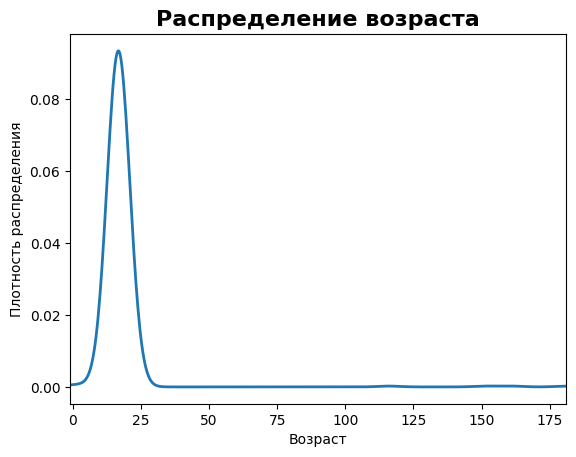

In [898]:
X_train["age"].plot.kde(linewidth=2)
plt.title(
    "Распределение возраста",
    fontweight="bold",
    fontsize=16,
)
plt.xlabel("Возраст")
plt.ylabel("Плотность распределения")
plt.xlim(X_train["age"].min(), X_train["age"].max())
plt.show()

## Характеристика: "Weekly study time"

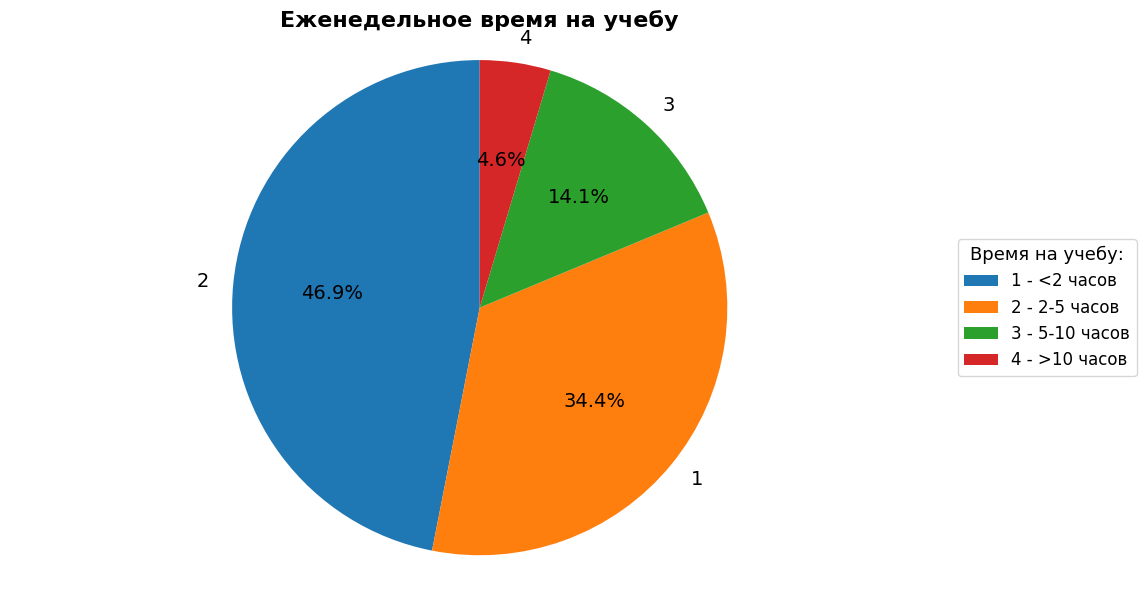

In [899]:
studytime_counts = X_train["studytime"].value_counts()

plt.figure(figsize=(10, 6))

patches, texts, autotexts = plt.pie(
    studytime_counts.values,
    labels=studytime_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 14},
)

legend_labels = [
    f"{label} - {time}"
    for label, time in zip(
        sorted(studytime_counts.index),
        ["<2 часов", "2-5 часов", "5-10 часов", ">10 часов"],
    )
]
plt.legend(
    patches,
    legend_labels,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12,
    title="Время на учебу:",
    title_fontsize=13,
)

plt.title(
    "Еженедельное время на учебу",
    fontweight="bold",
    fontsize=16,
)
plt.tight_layout()
plt.axis("equal")
plt.show()

## Характеристика: "Romantic Relationship"

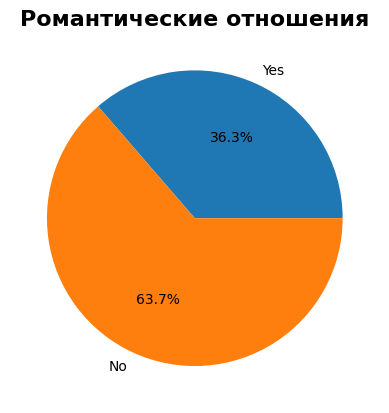

In [900]:
yes = X_train[X_train["romantic"] == "yes"].shape[0]
no = X_train[X_train["romantic"] == "no"].shape[0]

plt.pie([yes, no], labels=["Yes", "No"], autopct="%1.1f%%")
plt.title(
    "Романтические отношения",
    fontweight="bold",
    fontsize=16,
)
plt.show()

## Характеристика: "Alcohol Consumption"

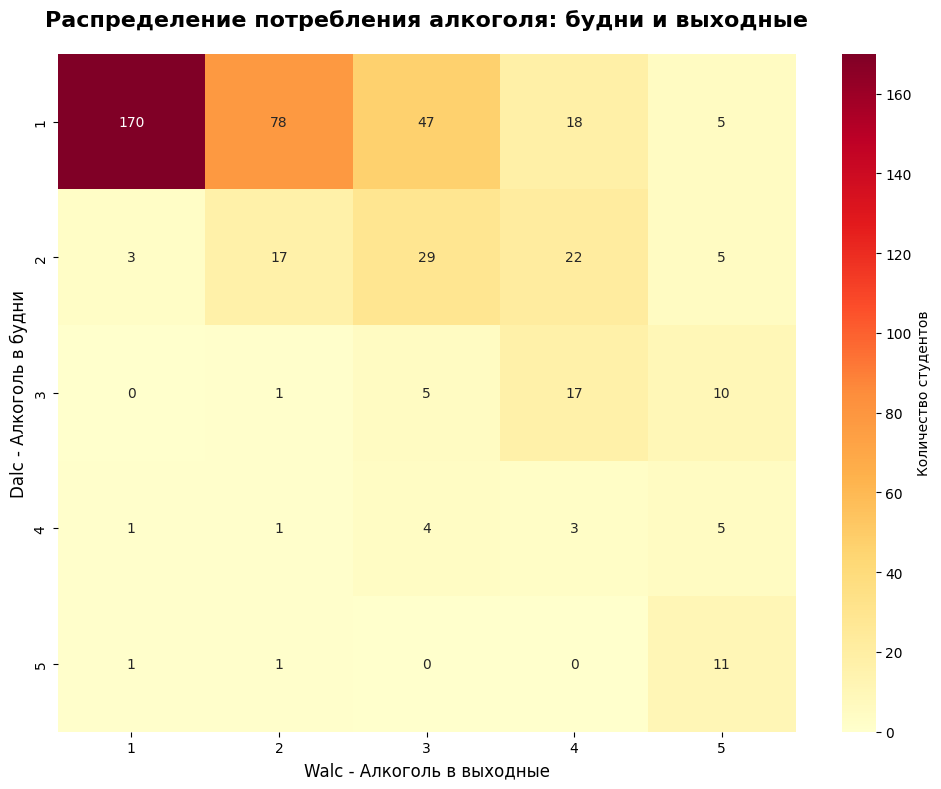

In [901]:
ct = pd.crosstab(X_train["Dalc"], X_train["Walc"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    ct, annot=True, fmt="d", cmap="YlOrRd", cbar_kws={"label": "Количество студентов"}
)
plt.title(
    "Распределение потребления алкоголя: будни и выходные",
    pad=20,
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Walc - Алкоголь в выходные", fontsize=12)
plt.ylabel("Dalc - Алкоголь в будни", fontsize=12)
plt.tight_layout()
plt.show()

## Целевая зависимость: "G3" (Final Grade)

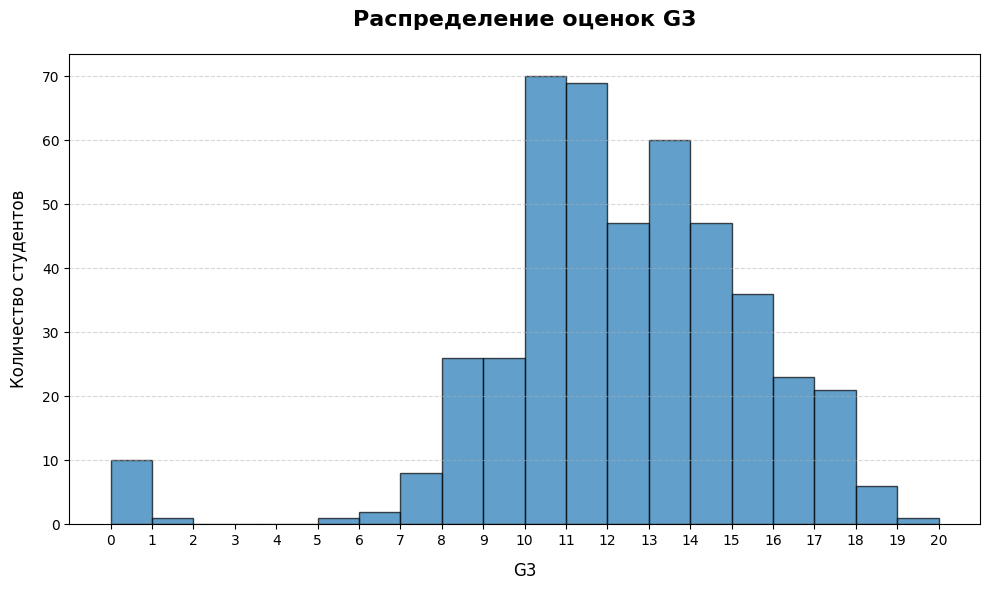

In [902]:
plt.figure(figsize=(10, 6))
plt.hist(
    X_train["G3"],
    bins=20,
    range=(0, 20),
    edgecolor="black",
    alpha=0.7,
)

plt.xticks(ticks=range(0, 21), labels=range(0, 21))
plt.title("Распределение оценок G3", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("G3", fontsize=12, labelpad=10)
plt.ylabel("Количество студентов", fontsize=12, labelpad=10)
plt.grid(axis="y", alpha=0.5, linestyle="--")
plt.tight_layout()
plt.show()

## Прочие характеристики

Прочитайте описание данных на [сайте](https://www.kaggle.com/uciml/student-alcohol-consumption) и подумайте, какие еще характеристики было бы полезно проанализировать. Постройте соответсвующие графики для выбранных характеристик.

Постройте графики еще для минимум 4 характеристик: числовая (2) и категориальная (2), применив хотя бы один раз:
- pieplot
- boxplot
- violinplot

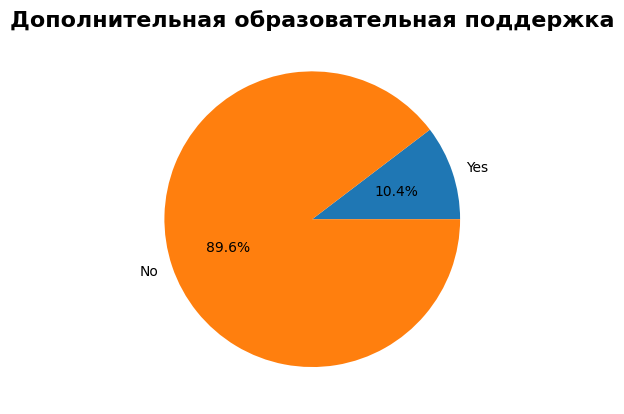

In [903]:
yes = X_train[X_train["schoolsup"] == "yes"].shape[0]
no = X_train[X_train["schoolsup"] == "no"].shape[0]

plt.pie([yes, no], labels=["Yes", "No"], autopct="%1.1f%%")
plt.title(
    "Дополнительная образовательная поддержка",
    fontweight="bold",
    fontsize=16,
)
plt.show()

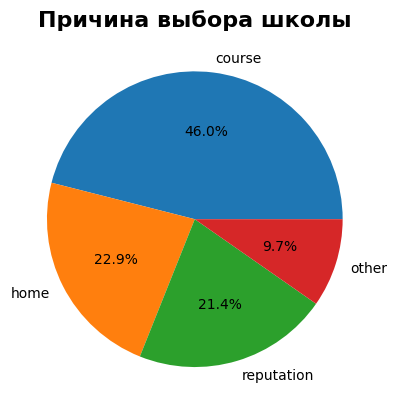

In [904]:
reason_counts = X_train["reason"].value_counts()
plt.pie(
    reason_counts.values,
    labels=reason_counts.index,
    autopct="%1.1f%%",
)
plt.title(
    "Причина выбора школы",
    fontweight="bold",
    fontsize=16,
)
plt.show()

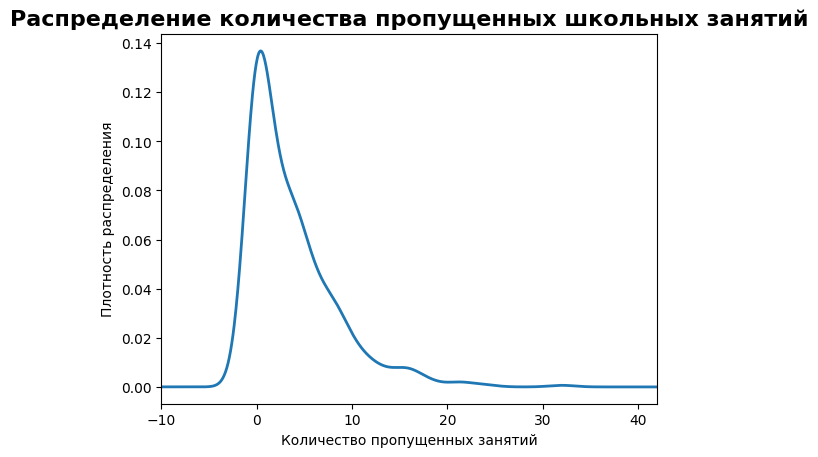

In [905]:
X_train["absences"].plot.kde(linewidth=2)
plt.title(
    "Распределение количества пропущенных школьных занятий",
    fontweight="bold",
    fontsize=16,
)
plt.xlabel("Количество пропущенных занятий")
plt.ylabel("Плотность распределения")
plt.xlim(X_train["absences"].min() - 10, X_train["absences"].max() + 10)
plt.show()

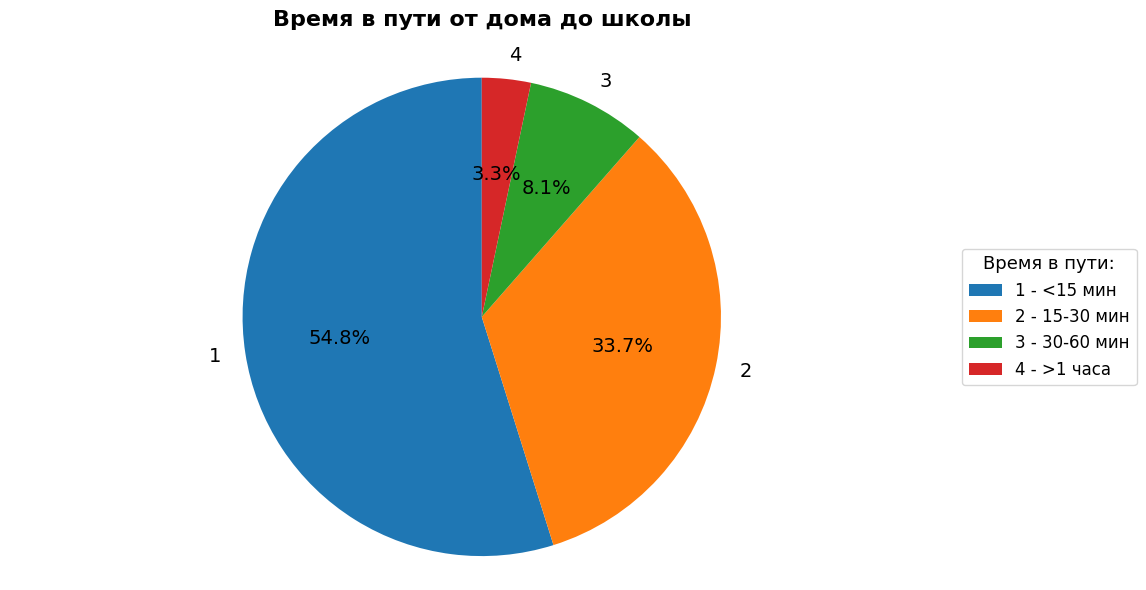

In [906]:
traveltime_counts = X_train["traveltime"].value_counts()
plt.figure(figsize=(10, 6))

patches, texts, autotexts = plt.pie(
    traveltime_counts.values,
    labels=traveltime_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    textprops={"fontsize": 14},
)

legend_labels = [
    f"{label} - {time}"
    for label, time in zip(
        sorted(traveltime_counts.index),
        ["<15 мин", "15-30 мин", "30-60 мин", ">1 часа"],
    )
]
plt.legend(
    patches,
    legend_labels,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12,
    title="Время в пути:",
    title_fontsize=13,
)

plt.title(
    "Время в пути от дома до школы",
    fontsize=16,
    pad=20,
    fontweight="bold",
)
plt.tight_layout()
plt.axis("equal")
plt.show()

C:\Users\MrWh1teF0x\AppData\Local\Temp\ipykernel_25432\3099542021.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


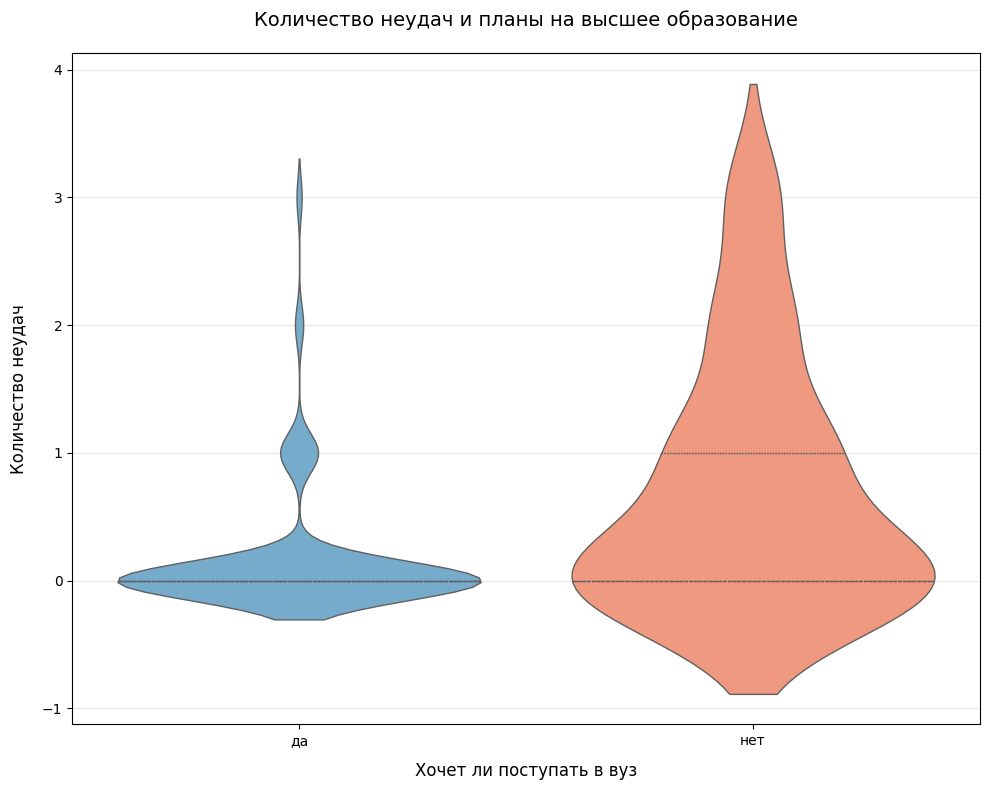

In [907]:
plt.figure(figsize=(10, 8))

pastel_blue = "#6baed6"
pastel_red = "#fc9272"

sns.violinplot(
    data=X_train,
    x="higher",
    y="failures",
    palette={"yes": pastel_blue, "no": pastel_red},
    order=["yes", "no"],
    inner="quart",
    saturation=0.8,
    linewidth=1,
)

plt.xlabel("Хочет ли поступать в вуз", fontsize=12, labelpad=10)
plt.ylabel("Количество неудач", fontsize=12, labelpad=10)
plt.title("Количество неудач и планы на высшее образование", fontsize=14, pad=20)

plt.xticks([0, 1], ["да", "нет"])
plt.grid(axis="y", alpha=0.3, linestyle="-")
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()

## Корреляция признаков

Для того, чтобы быстро получить оценку о взаимосвязи признаков целесообразно построить матрицу их корреляции. Постройте матрицу корреляции.

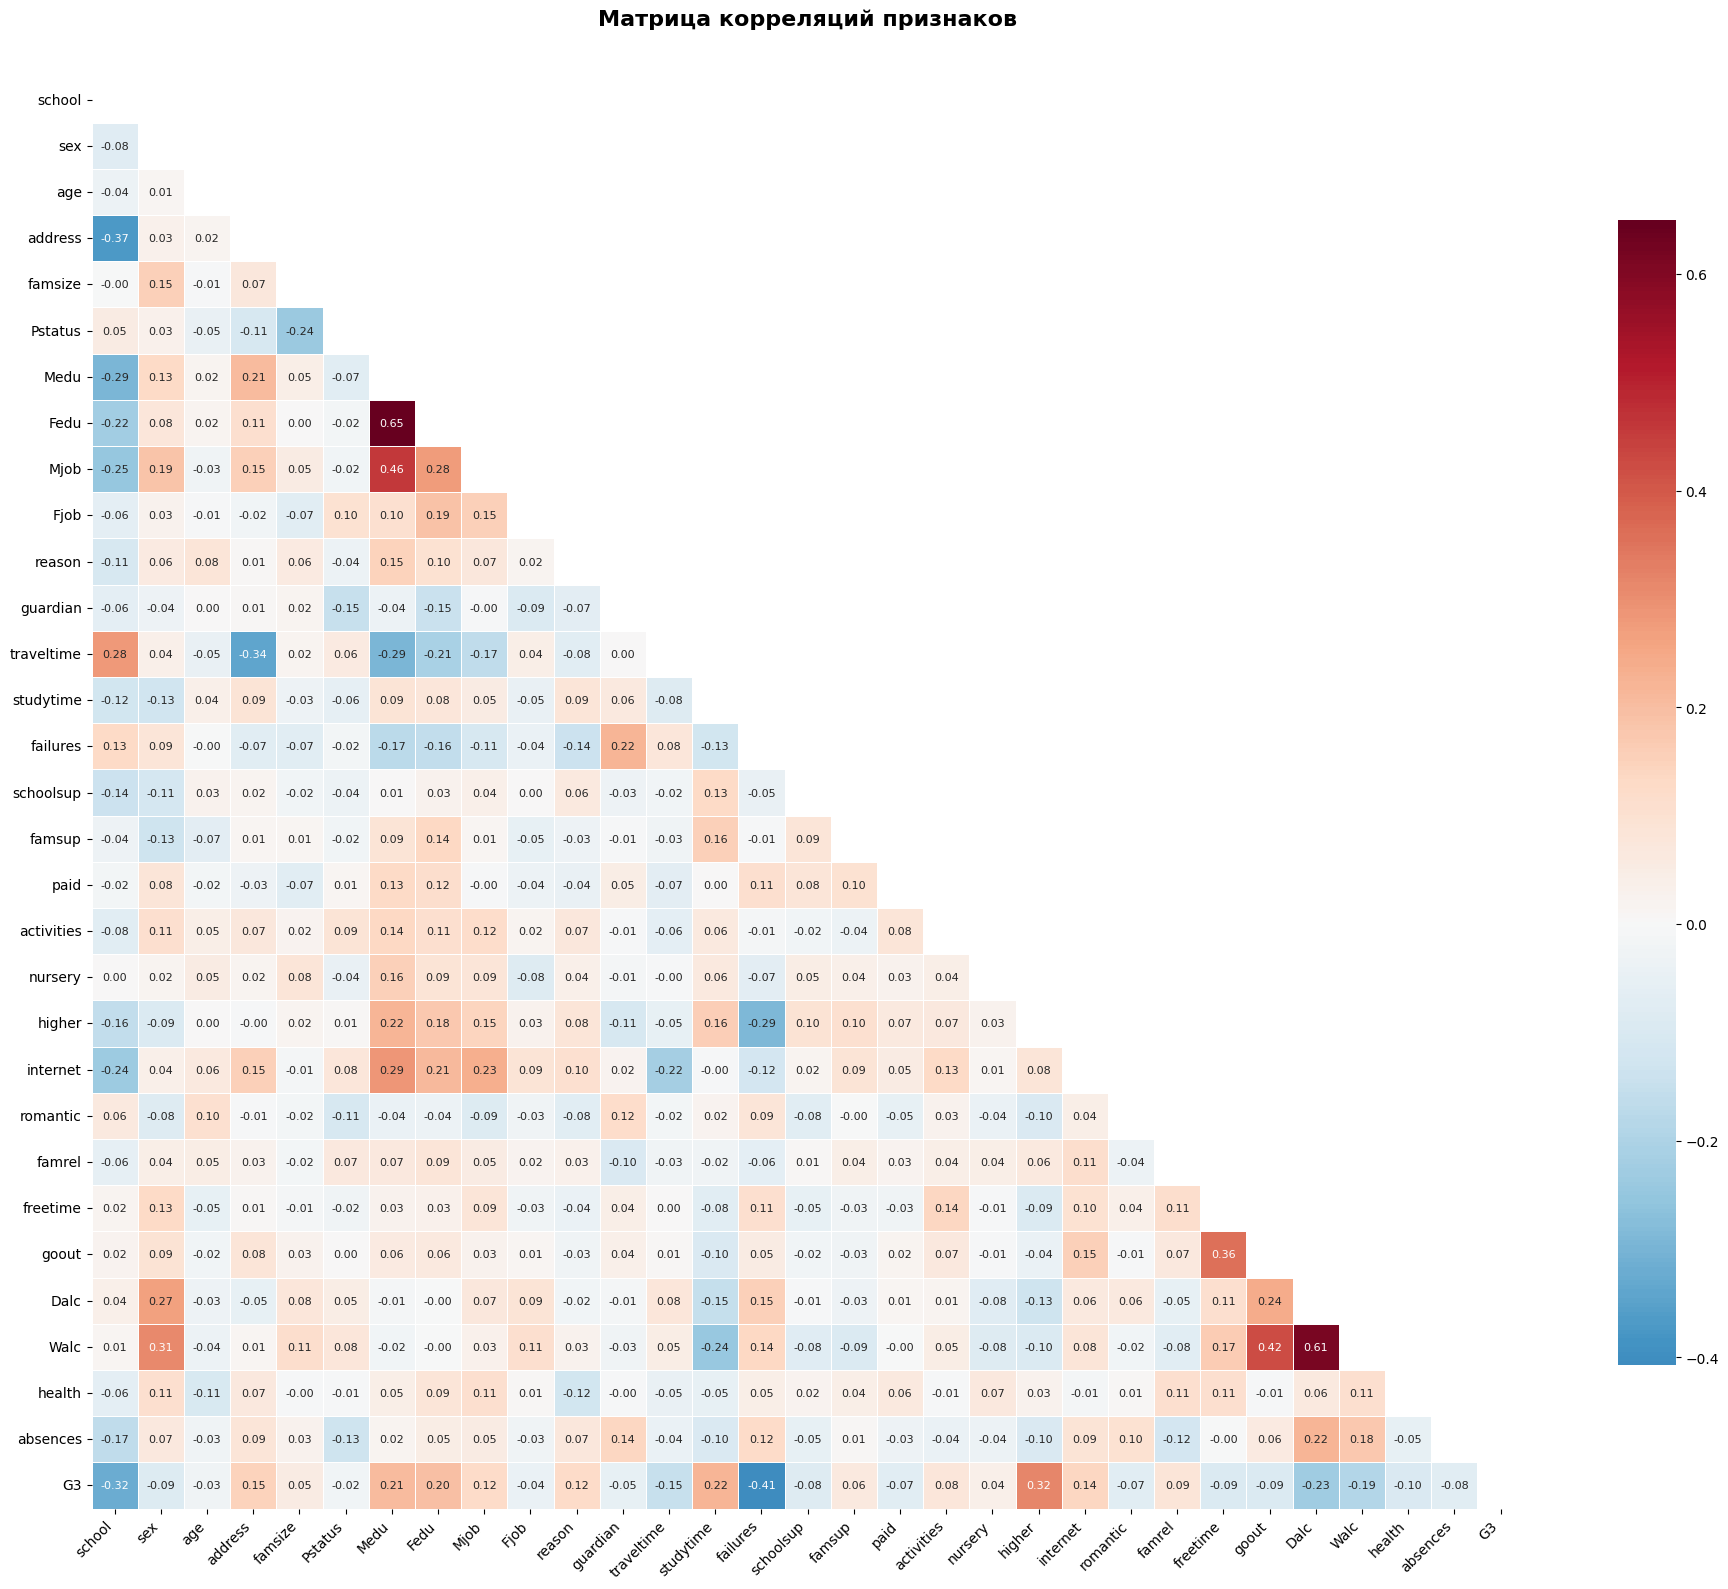

In [908]:
# Преобразуем категориальные переменные в числовые для корреляции
categorical_columns = [
    "school",
    "sex",
    "address",
    "famsize",
    "Pstatus",
    "Mjob",
    "Fjob",
    "reason",
    "guardian",
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic",
]

X_train_copy = X_train.copy()

le = LabelEncoder()
for col in categorical_columns:
    if col in X_train_copy.columns:
        X_train_copy[col] = le.fit_transform(X_train_copy[col].astype(str))

correlation_matrix = X_train_copy.corr()

plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap="RdBu_r",
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    annot_kws={"size": 8},
)

plt.title("Матрица корреляций признаков\n", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

## Посчитайте корреляцию Спирмана и нарисуйте ее в виде тепловой карты

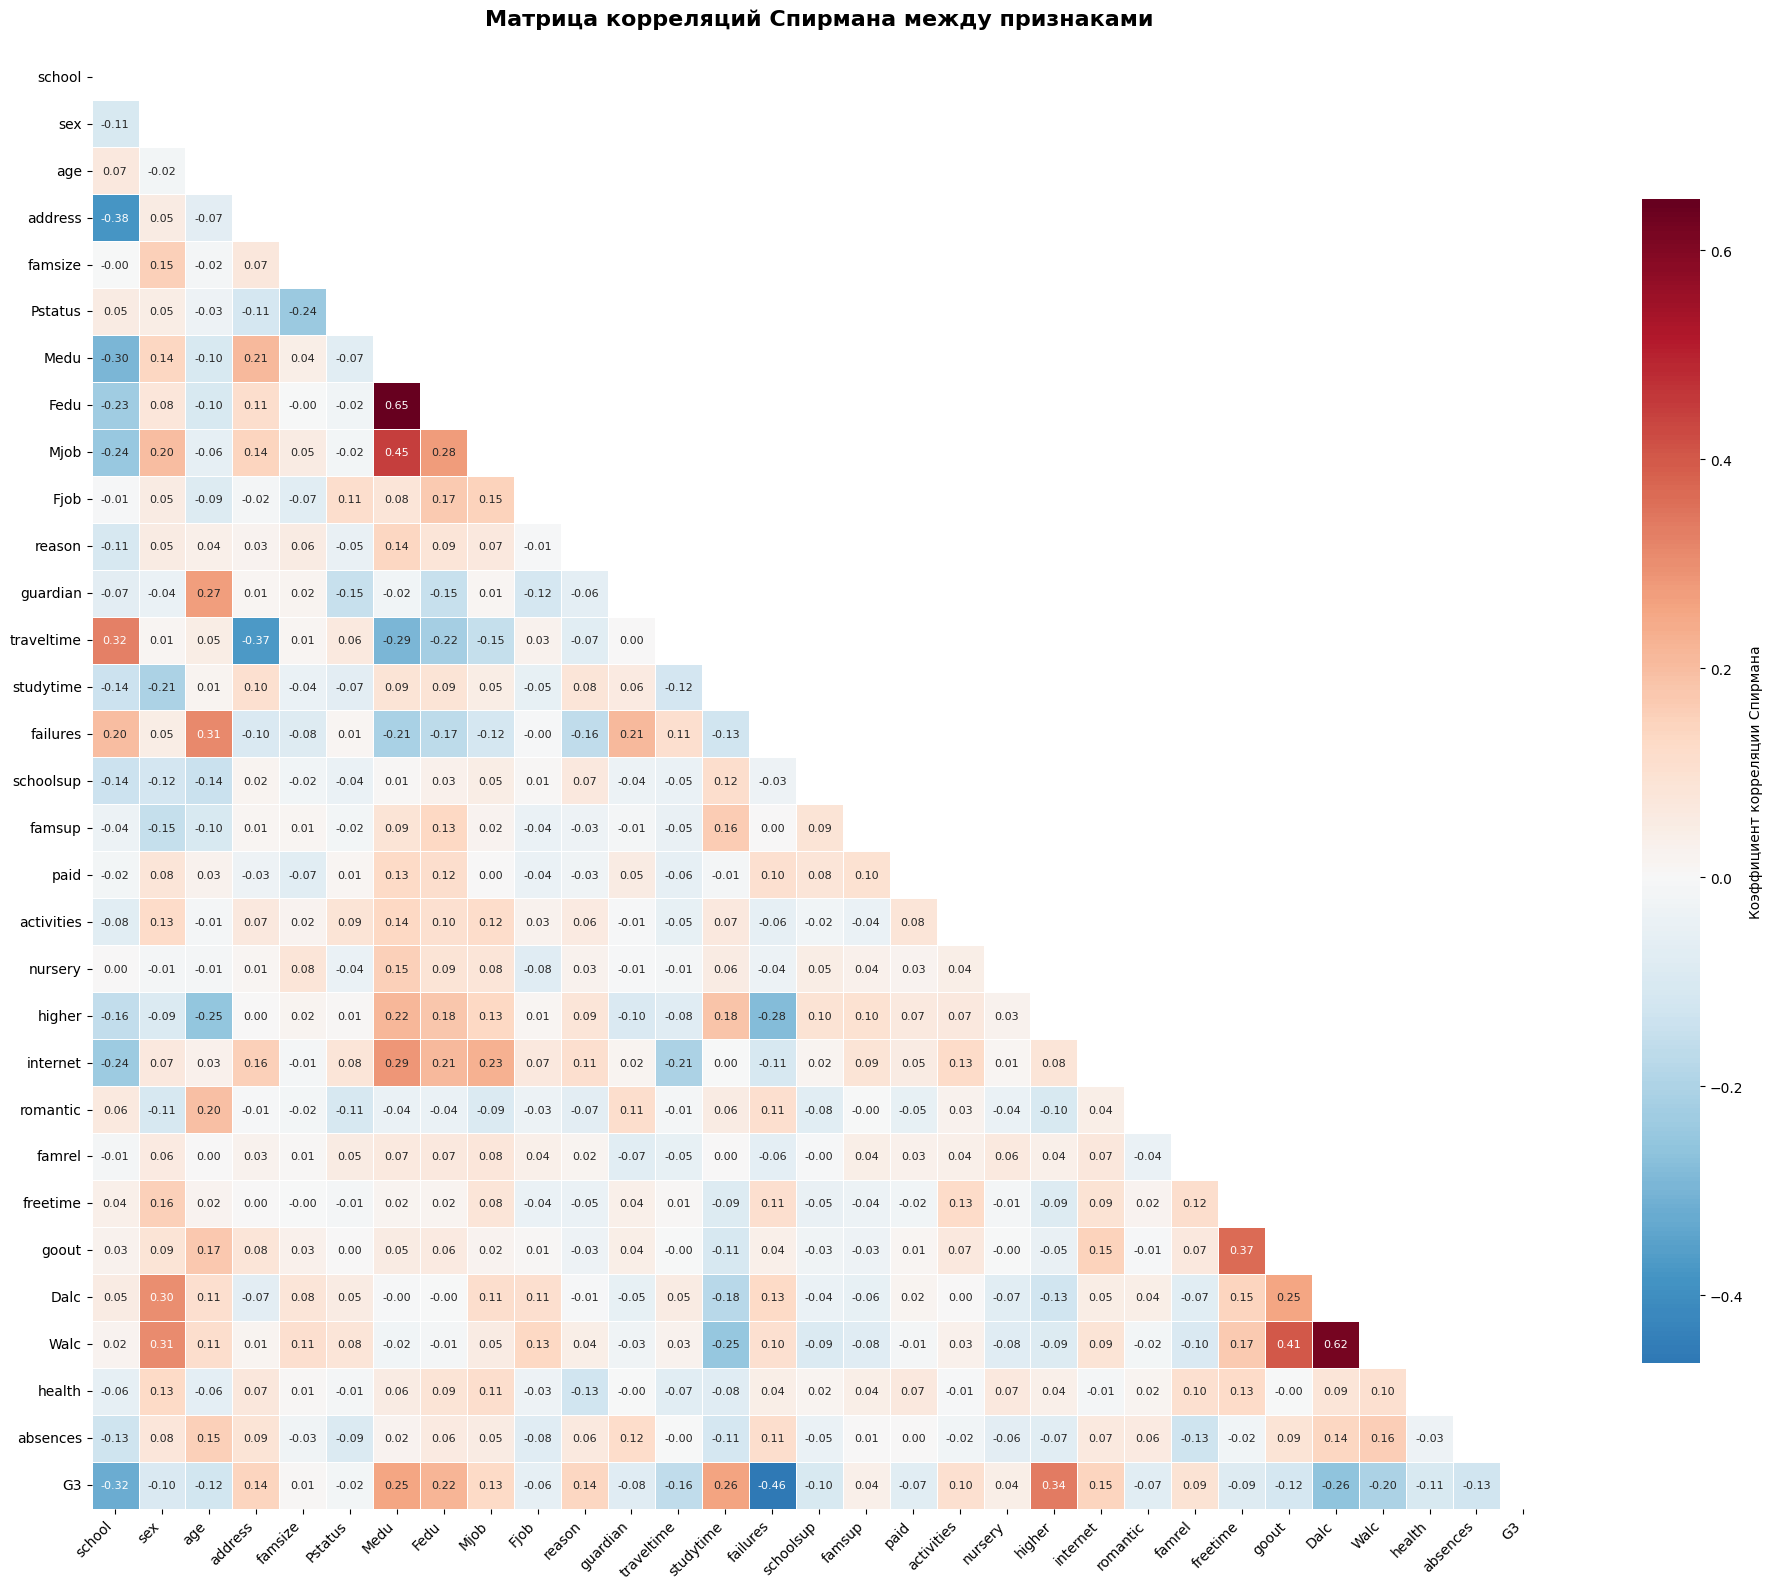

In [909]:
# Вычисляем матрицу корреляций Спирмена
spearman_corr = X_train_copy.corr(method="spearman")

plt.figure(figsize=(20, 16))

mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

sns.heatmap(
    spearman_corr,
    mask=mask,
    cmap="RdBu_r",
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Коэффициент корреляции Спирмана"},
    linewidths=0.5,
    annot_kws={"size": 8},
)

plt.title(
    "Матрица корреляций Спирмана между признаками",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

## Диапазон значений характеристик

Посчитайте число уникальных значений для каждого признака и сравните их между собой.

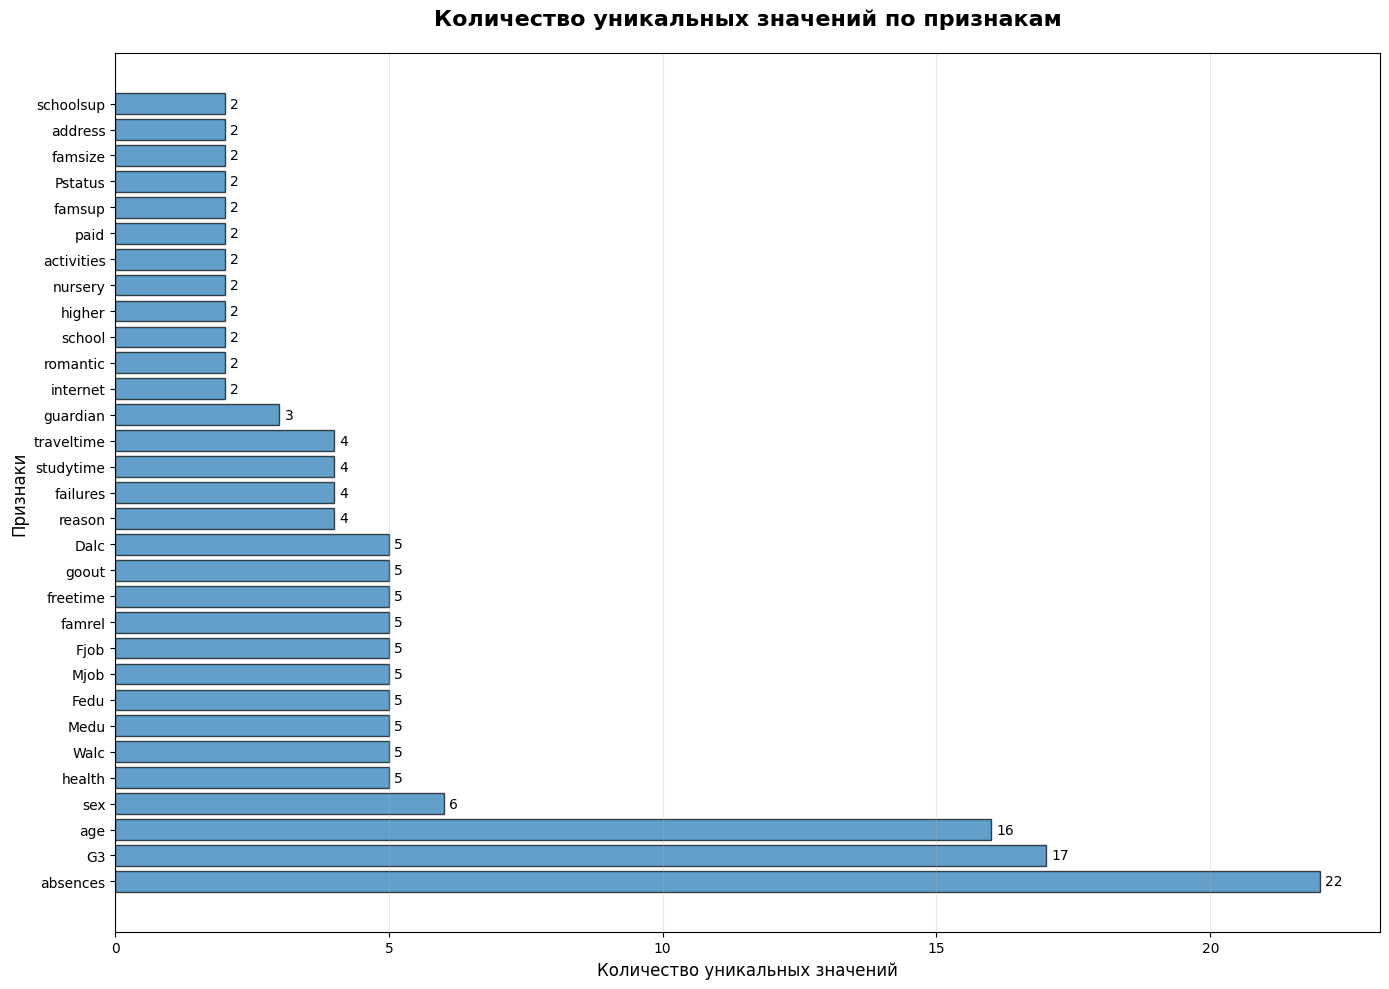

In [910]:
unique_counts = X_train.nunique().sort_values(ascending=False)

plt.figure(figsize=(14, 10))
bars = plt.barh(
    unique_counts.index,
    unique_counts.values,
    edgecolor="black",
    alpha=0.7,
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width)}",
        ha="left",
        va="center",
        fontsize=10,
    )

plt.xlabel("Количество уникальных значений", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.title(
    "Количество уникальных значений по признакам",
    fontsize=16,
    pad=20,
    fontweight="bold",
)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

## Найдите соотношение мужского и женского пола для самых выскоих оценок (G3) из датасета, у которых время на дорогу больше, чем 30 минут. Нарисуйте это соотношение на круговой диаграмме

C:\Users\MrWh1teF0x\AppData\Local\Temp\ipykernel_25432\1649251052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  need_students = X_train[X_train["traveltime"] >= 3][X_train["G3"] >= 15]


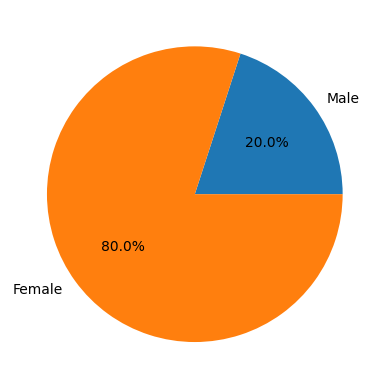

In [911]:
need_students = X_train[X_train["traveltime"] >= 3][X_train["G3"] >= 15]
male = need_students[need_students["sex"] == "M"].shape[0]
female = need_students[need_students["sex"] == "F"].shape[0]

plt.pie(
    [
        male,
        female,
    ],
    labels=["Male", "Female"],
    autopct="%1.1f%%",
)
plt.show()

## Построить boxplot для оценок по возрасту.  

C:\Users\MrWh1teF0x\AppData\Local\Temp\ipykernel_25432\2551862227.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_train, x="age", y="G3", palette="viridis", linewidth=1.5)


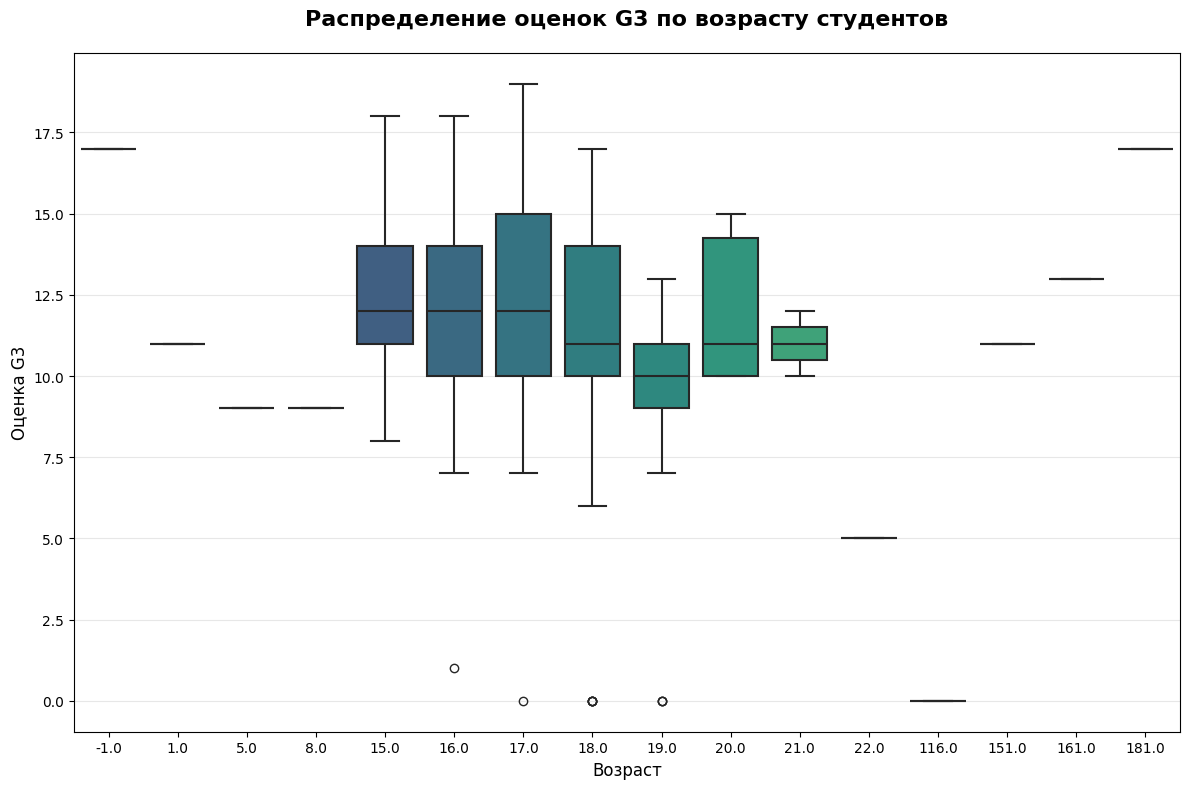

In [912]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=X_train, x="age", y="G3", palette="viridis", linewidth=1.5)

plt.title(
    "Распределение оценок G3 по возрасту студентов",
    fontsize=16,
    pad=20,
    fontweight="bold",
)
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Оценка G3", fontsize=12)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## Найти id топ-5 самых юных отличников.

In [913]:
X_train[X_train["G3"] >= 17].sort_values(["age"], ascending=True).sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
197,GP,M,15.0,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,17
143,GP,F,18.0,U,LE3,T,4,2,teacher,other,...,yes,no,4,2,2,1,1,3,0,17
175,GP,F,17.0,U,GT3,A,4,3,services,services,...,yes,yes,5,2,2,1,2,5,14,17
349,GP,M,16.0,U,GT3,T,4,3,health,services,...,yes,no,4,2,2,1,1,2,2,17
221,GP,M,17.0,U,LE3,A,3,2,other,other,...,yes,no,4,4,4,1,2,5,10,18


## Для каждого возраста найдите максимальную и минимальную оценку (G3)

In [914]:
print("Минимальная оценка")
X_train[["age", "G3"]].groupby(["age"]).min().T

Минимальная оценка


age,-1.0,1.0,5.0,8.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,116.0,151.0,161.0,181.0
G3,17,11,9,9,8,1,0,0,0,10,10,5,0,11,13,17


# Часть 2. Предобработка данных

Теперь перейдем к подготовке данных для моделей машинного обучения. Не все из описанного ниже нужно делать. Подумайте.

## Найдите и исправьте ошибки в данных

In [915]:
# Найдем значения, которые некорректны
valid_ranges = {
    "school": ["GP", "MS"],
    "sex": ["F", "M"],
    "age": lambda x: 15 <= x <= 22,
    "address": ["U", "R"],
    "famsize": ["LE3", "GT3"],
    "Pstatus": ["T", "A"],
    "Medu": [0, 1, 2, 3, 4],
    "Fedu": [0, 1, 2, 3, 4],
    "Mjob": ["teacher", "health", "services", "at_home", "other"],
    "Fjob": ["teacher", "health", "services", "at_home", "other"],
    "reason": ["home", "reputation", "course", "other"],
    "guardian": ["mother", "father", "other"],
    "traveltime": [1, 2, 3, 4],
    "studytime": [1, 2, 3, 4],
    "failures": lambda x: 0 <= x <= 4,
    "schoolsup": ["yes", "no"],
    "famsup": ["yes", "no"],
    "paid": ["yes", "no"],
    "activities": ["yes", "no"],
    "nursery": ["yes", "no"],
    "higher": ["yes", "no"],
    "internet": ["yes", "no"],
    "romantic": ["yes", "no"],
    "famrel": [1, 2, 3, 4, 5],
    "freetime": [1, 2, 3, 4, 5],
    "goout": [1, 2, 3, 4, 5],
    "Dalc": [1, 2, 3, 4, 5],
    "Walc": [1, 2, 3, 4, 5],
    "health": [1, 2, 3, 4, 5],
    "absences": lambda x: 0 <= x <= 93,
}

incorrect_counts = {}

for column, valid_values in valid_ranges.items():
    if callable(valid_values):
        mask = ~X_train[column].apply(valid_values)
    else:
        mask = ~X_train[column].isin(valid_values)
    incorrect_counts[column] = (mask | X_train[column].isna()).sum()

incorr_vals = pd.DataFrame({"incorrect_values": incorrect_counts})

incorr_vals.sort_values("incorrect_values", ascending=False)[
    incorr_vals["incorrect_values"] != 0
]

C:\Users\MrWh1teF0x\AppData\Local\Temp\ipykernel_25432\2921006726.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incorr_vals.sort_values("incorrect_values", ascending=False)[


,incorrect_values
age,36
sex,8
address,5


In [916]:
# Заменяем некорректные значения полов на рандомные с соответственной частотой
male = X_train[X_train["sex"] == "M"].shape[0]
female = X_train[X_train["sex"] == "F"].shape[0]
all_people = male + female


if len(X_train.loc[~X_train["sex"].isin(valid_ranges["sex"]), "sex"]) > 0:
    X_train.loc[~X_train["sex"].isin(valid_ranges["sex"]), "sex"] = np.random.choice(
        ["M", "F"],
        p=[male / all_people, female / all_people],
        size=incorr_vals.loc["sex", "incorrect_values"],
    )

# Заменяем некорретные значения возраста на медианное значение
if len(X_train.loc[~X_train["age"].apply(valid_ranges["age"]), "age"]) > 0:
    valid_ages_mean = X_train[
        X_train["age"].apply(valid_ranges["age"]) & X_train["age"].notna()
    ]["age"].median()
    X_train.loc[~X_train["age"].apply(valid_ranges["age"]), "age"] = [
        valid_ages_mean for _ in range(incorr_vals.loc["age", "incorrect_values"])
    ]

# Заменяем некорректные значения адреса на рандомные с соответственной частотой
u_addr = X_train[X_train["address"] == "U"].shape[0]
r_addr = X_train[X_train["address"] == "R"].shape[0]
all_addrs = u_addr + r_addr

if len(X_train.loc[~X_train["address"].isin(valid_ranges["address"]), "address"]) > 0:
    X_train.loc[~X_train["address"].isin(valid_ranges["address"]), "address"] = (
        np.random.choice(
            ["U", "R"],
            p=[u_addr / all_addrs, r_addr / all_addrs],
            size=incorr_vals.loc["address", "incorrect_values"],
        )
    )

## Удалите скоррелированные данные
### Не думаю, что нужно это делать

## Заполните пропуски в данных

Заполнить пропуски в данных можно одним из следующи способов или разными для разных признаков:
- Заполнить нулями
- Выбросить данные с нулями (не рекомендуется)
- Заполнить средним для данного параметра
- Заполнить наиболее соответствующим данному прецеденту (рекомендуется)

### Уже заполнил (код выше)

## Закодируйте категориальные признаки

In [917]:
l_bin = LabelBinarizer()
l_enc = LabelEncoder()

df_encoded = X_train.copy()

df_encoded["school"] = l_bin.fit_transform(df_encoded["school"])
df_encoded["sex"] = l_bin.fit_transform(df_encoded["sex"])
df_encoded["famsize"] = l_bin.fit_transform(df_encoded["famsize"])
df_encoded["Pstatus"] = l_bin.fit_transform(df_encoded["Pstatus"])
df_encoded["schoolsup"] = l_bin.fit_transform(df_encoded["schoolsup"])
df_encoded["famsup"] = l_bin.fit_transform(df_encoded["famsup"])
df_encoded["paid"] = l_bin.fit_transform(df_encoded["paid"])
df_encoded["activities"] = l_bin.fit_transform(df_encoded["activities"])
df_encoded["nursery"] = l_bin.fit_transform(df_encoded["nursery"])
df_encoded["internet"] = l_bin.fit_transform(df_encoded["internet"])
df_encoded["romantic"] = l_bin.fit_transform(df_encoded["romantic"])
df_encoded["Mjob"] = l_enc.fit_transform(df_encoded["Mjob"])
df_encoded["Fjob"] = l_enc.fit_transform(df_encoded["Fjob"])
df_encoded["reason"] = l_enc.fit_transform(df_encoded["reason"])
df_encoded["guardian"] = l_enc.fit_transform(df_encoded["guardian"])
df_encoded["address"] = l_bin.fit_transform(df_encoded["address"])
df_encoded["higher"] = l_bin.fit_transform(df_encoded["higher"])

## Придумайте сложные признаки

Сложные признаки - это комбинации существующих (линейных или нелинейных).
Это нужно для того, чтобы самостоятельно добавить нелинейность в алгоритм.

Приведите не менее двух признаков.

In [918]:
df_with_complex_features = df_encoded.copy()

# Комбинация образования родителей и их профессий
df_with_complex_features["family_edu_potential"] = (
    df_with_complex_features["Medu"]  # Произведение образования родителей
    * df_with_complex_features["Fedu"]
    * (df_with_complex_features["Mjob"] + 1)  # Произведение работы родителей
    * (df_with_complex_features["Fjob"] + 1)
)
# Нормализуем
df_with_complex_features["family_edu_potential"] = (
    df_with_complex_features["family_edu_potential"]
    / df_with_complex_features["family_edu_potential"].max()
)

# Комбинация времени учебы, пропусков и неудач
df_with_complex_features["study_discipline_index"] = (
    df_with_complex_features["studytime"] ** 2  # Квадрат времени учебы (нелинейность)
    / (
        df_with_complex_features["absences"] + 1
    )  # Учет пропусков (+1 чтобы избежать деления на 0)
    * (1 / (df_with_complex_features["failures"] + 1))  # Обратная зависимость от неудач
    * df_with_complex_features["goout"].apply(
        lambda x: 1 / (x + 0.5)
    )  # Обратная зависимость от времени с друзьями
)

# Баланс между учебой и социальной жизнью
df_with_complex_features["study_social_balance"] = (
    np.log1p(
        df_with_complex_features["studytime"] * df_with_complex_features["famrel"]
    )  # Учеба и семейные отношения
    - np.sqrt(
        df_with_complex_features["goout"] * df_with_complex_features["Dalc"]
    )  # Социальная активность и алкоголь
    + df_with_complex_features["activities"]  # Внеучебная активность
)

df_with_complex_features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G3,family_edu_potential,study_discipline_index,study_social_balance
0,1,1,17.0,1,1,1,1,3,0,3,...,3,3,2,3,3,0,9,0.0300,0.285714,-0.840052
1,0,1,17.0,0,1,1,3,3,4,2,...,3,4,3,5,3,16,12,0.3375,0.013072,-1.077807
2,0,1,15.0,1,0,1,3,4,2,2,...,5,1,1,1,5,0,13,0.2700,2.666667,2.397895
3,1,1,17.0,0,0,1,4,3,3,2,...,5,5,1,3,2,4,11,0.3600,0.072727,0.961157
4,0,0,20.0,0,0,1,2,1,2,2,...,2,3,1,2,2,8,12,0.0450,0.126984,0.366561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0,1,15.0,1,0,1,4,2,2,2,...,3,3,1,1,3,0,10,0.1800,4.571429,0.832899
450,0,0,15.0,1,0,1,2,2,2,2,...,1,2,1,1,3,4,10,0.0900,1.280000,1.630309
451,0,1,16.0,1,0,1,4,4,3,3,...,3,2,1,2,5,4,15,0.6400,0.080000,1.377546
452,1,0,15.0,0,1,1,1,1,0,3,...,4,3,1,2,4,0,10,0.0100,1.142857,0.665844


# Часть 3. Стратегия валидации

Итак, у вас есть данные для обучения и данные, на которых необходимо сделать предсказание. Для оценки точности необходимо проводить валидацию (так как мало данных, можно проводить кросс валидацию).
Валидацию проще всего реализовать методами sklearn, например:
- KFold
- ShuffleSplit
- StratifiedKFold
- StratifiedShuffleSplit
- GroupKFold
- GroupShuffleSplit

## Разделите данные и объясните выбор стратегии

In [919]:
fold_groups = GroupKFold(n_splits=2)
fold = StratifiedKFold(n_splits=2)

X = df_with_complex_features.drop("G3", axis=1)
y = df_with_complex_features["G3"]

grouped_fold = list(
    fold_groups.split(X=X, y=y, groups=df_with_complex_features["school"])
)
ungrouped_fold = list(fold.split(X=X, y=y))

c:\Users\MrWh1teF0x\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


__Ваш ответ:__ 
- GroupKFold - проверяет работу модели на новых школах

- StratifiedKFold - оценивает надежность модели на несбалансированных данных

Вывод: GroupKFold тестирует адаптацию к новым условиям, StratifiedKFold - общую стабильность. В вашем случае ShuffleSplit оказалась практичнее из-за ограничений данных.

# Часть 4. Заполнение пропусков в данных

## Фильтрация по диапазону значений

Проверьте, что все характеристики принадлежат тому диапазону значений, который приведен в описании к исходным данным. Например, если в графе "Пол" есть значение FF, P или -1, то это явная ошибка заполнения.

Приведите данные в соответствии с описанием данных. Если значение указано неверно - укажите ```NaN```.

### Было сделано выше

## Адаптивное заполнения пропусков

Реализуйте стратегию заполнения пропусков данных на основе схожих примеров. Обучите один из известных вам алгоритмов (knn, Naive Bayes, linear regression) для предсказания той характеристики, пропуски которой присутсвуют в данных. В качестве характеристики для обучения алгоритмов __нельзя__ использовать ```G3```.

### Пропусков в данных нет

# Часть 5. Обучение алгоритма

Целевая переменная принимает дискретные значения [0; 20], поэтому вы можете поставить как задачу классификации, так и задачу регрессии.

!Не забудьте про оптимизацию параметров алгоритмов, у вас же уже есть данные для валидации.

In [920]:
# Вспомагательные функции


# Функция для подсчета метрик
def get_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return {
        "mse": mse,
        "rmse": np.sqrt(mse),
        "mae": mean_absolute_error(y_true, y_pred),
        "r2": r2_score(y_true, y_pred),
    }


# Функция для вывода метрик
def print_metrics(metrics: dict):
    print("Metrics:")
    print(f"\t MSE: {metrics["mse"]:1f}")
    print(f"\t RMSE: {metrics["rmse"]:1f}")
    print(f"\t MAE: {metrics["mae"]:1f}")
    print(f"\t R^2: {metrics["r2"]:1f}")


# Функция для визуализации результата различных обучений
def visualize(true_values, predicted, label=""):
    plt.figure(figsize=(18, 8))
    plt.plot(np.arange(len(predicted)), predicted, "^-", label=label)
    plt.plot(np.arange(len(predicted)), true_values, ".-", label="Истинные значения")
    plt.title(label, fontsize=16, fontweight="bold")
    plt.legend()
    plt.grid(True)

## KNN

Metrics:
	 MSE: 15.864081
	 RMSE: 3.982974
	 MAE: 2.887048
	 R^2: -0.204989
Metrics:
	 MSE: 7.120004
	 RMSE: 2.668334
	 MAE: 1.953397
	 R^2: 0.291834


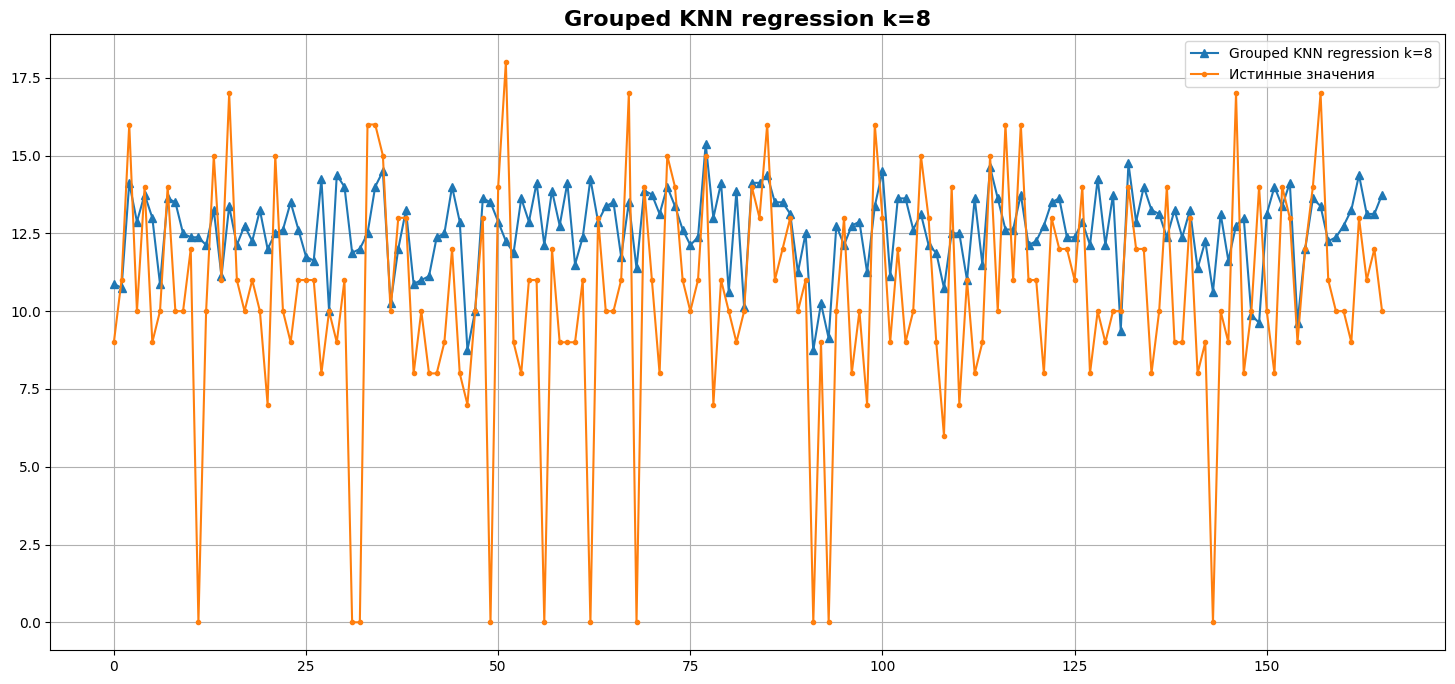

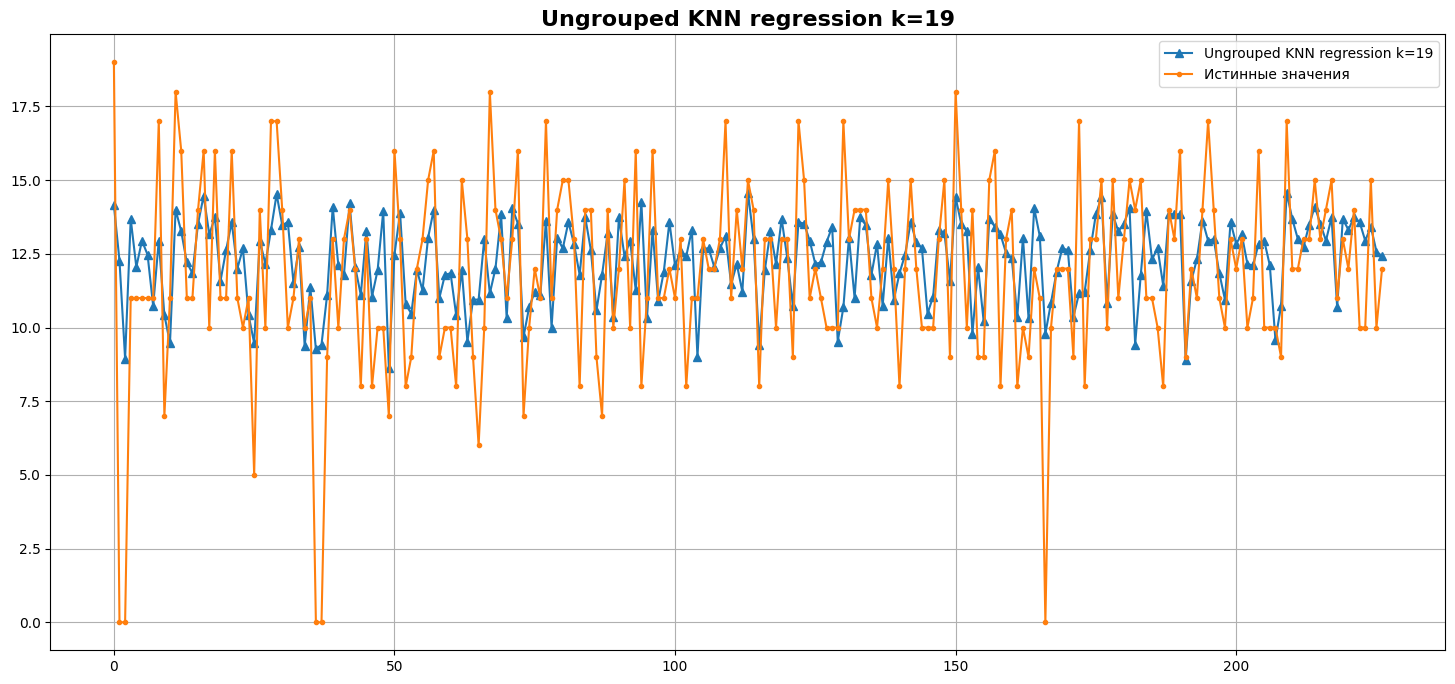

In [921]:
def run_knn(folded, k=10):
    pipeline = Pipeline(
        [("scaler", StandardScaler()), ("model", KNeighborsRegressor(n_neighbors=k))]
    )
    pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics


best_r2 = None

for k in range(2, 50):
    pipeline, predicted, true_values, metrics = run_knn(grouped_fold, k=k)

    if best_r2 is None or metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, k))

print_metrics(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Grouped KNN regression k={best_r2[1][2]}")

predicted_knn = [best_r2[1][0]]
knn_metric_params = [(best_r2[0]["r2"], pipeline)]

for k in range(2, 50):
    pipeline, predicted, true_values, metrics = run_knn(ungrouped_fold, k=k)
    if best_r2 is None or metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, k))

print_metrics(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Ungrouped KNN regression k={best_r2[1][2]}")

predicted_knn.append(best_r2[1][0])
knn_metric_params.append((best_r2[0]["r2"], pipeline))

## Bayes

Metrics:
	 MSE: 14.111571
	 RMSE: 3.756537
	 MAE: 2.631909
	 R^2: -0.071873
Metrics:
	 MSE: 7.221799
	 RMSE: 2.687340
	 MAE: 1.986580
	 R^2: 0.281709


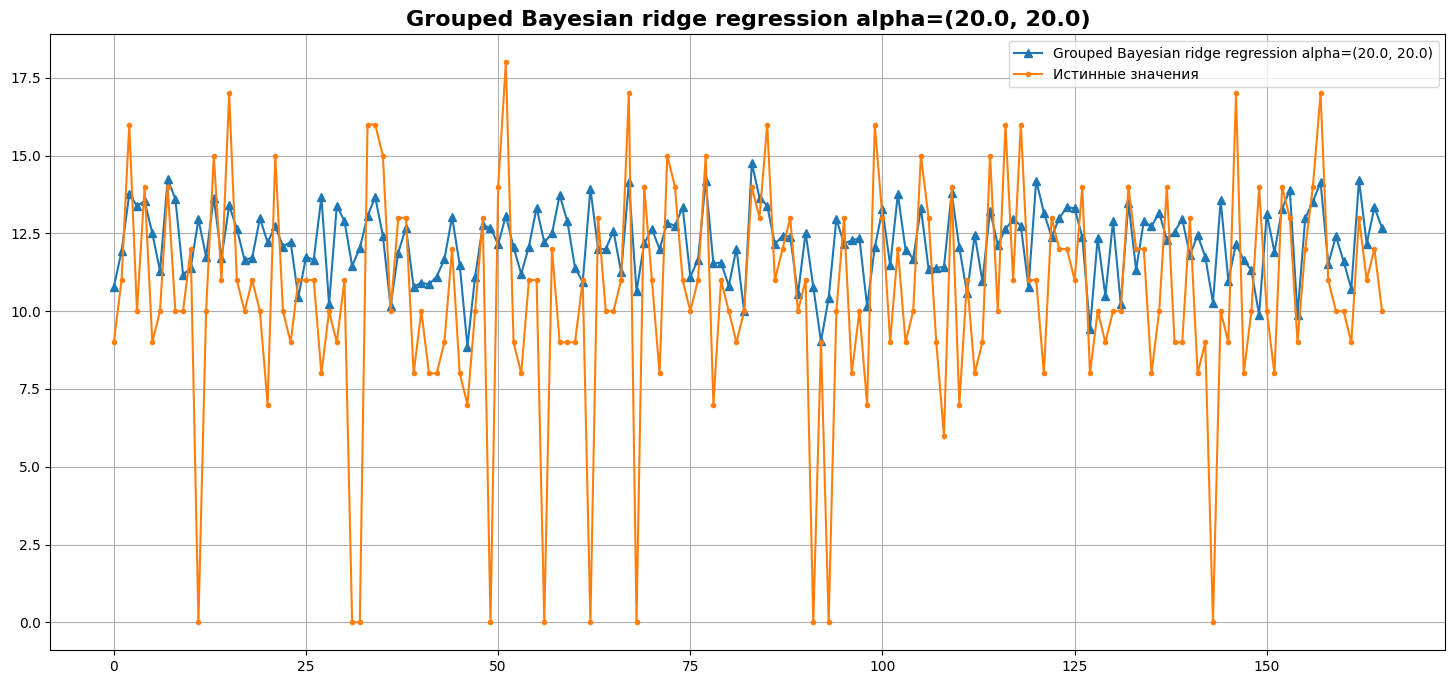

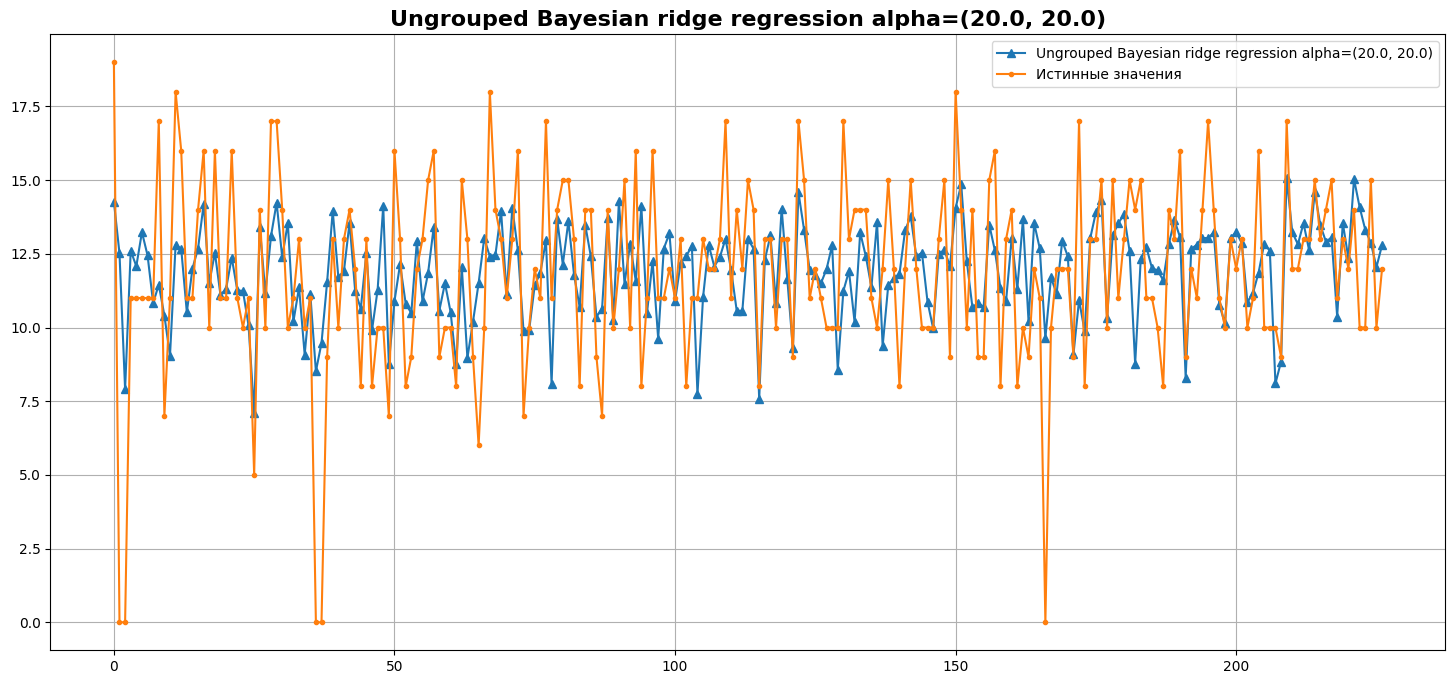

In [922]:
def run_bss(folded, alpha_1, alpha_2):
    pipeline = Pipeline(
        [
            ("scaler", RobustScaler()),
            ("model", BayesianRidge(alpha_1=alpha_1, alpha_2=alpha_2)),
        ]
    )
    pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics


best_r2 = None

for alpha_1, alpha_2 in zip(np.linspace(0, 20, 120), np.linspace(0, 20, 120)):
    pipeline, predicted, true_values, metrics = run_bss(
        grouped_fold, alpha_1=alpha_1, alpha_2=alpha_2
    )

    if best_r2 is None or metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, (alpha_1, alpha_2)))

print_metrics(best_r2[0])
visualize(
    best_r2[1][1],
    best_r2[1][0],
    f"Grouped Bayesian ridge regression alpha={best_r2[1][2]}",
)

predicted_bss = [best_r2[1][0]]
bss_metric_params = [(best_r2[0]["r2"], pipeline)]

for alpha_1, alpha_2 in zip(np.linspace(0, 20, 120), np.linspace(0, 20, 120)):
    pipeline, predicted, true_values, metrics = run_bss(
        ungrouped_fold, alpha_1=alpha_1, alpha_2=alpha_2
    )

    if best_r2 is None or metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, (alpha_1, alpha_2)))

print_metrics(best_r2[0])
visualize(
    best_r2[1][1],
    best_r2[1][0],
    f"Ungrouped Bayesian ridge regression alpha={best_r2[1][2]}",
)

predicted_bss.append(best_r2[1][0])
bss_metric_params.append((best_r2[0]["r2"], pipeline))

## Регрессия

Metrics:
	 MSE: 14.262255
	 RMSE: 3.776540
	 MAE: 2.615790
	 R^2: -0.083319
Metrics:
	 MSE: 7.575060
	 RMSE: 2.752283
	 MAE: 2.094111
	 R^2: 0.246573


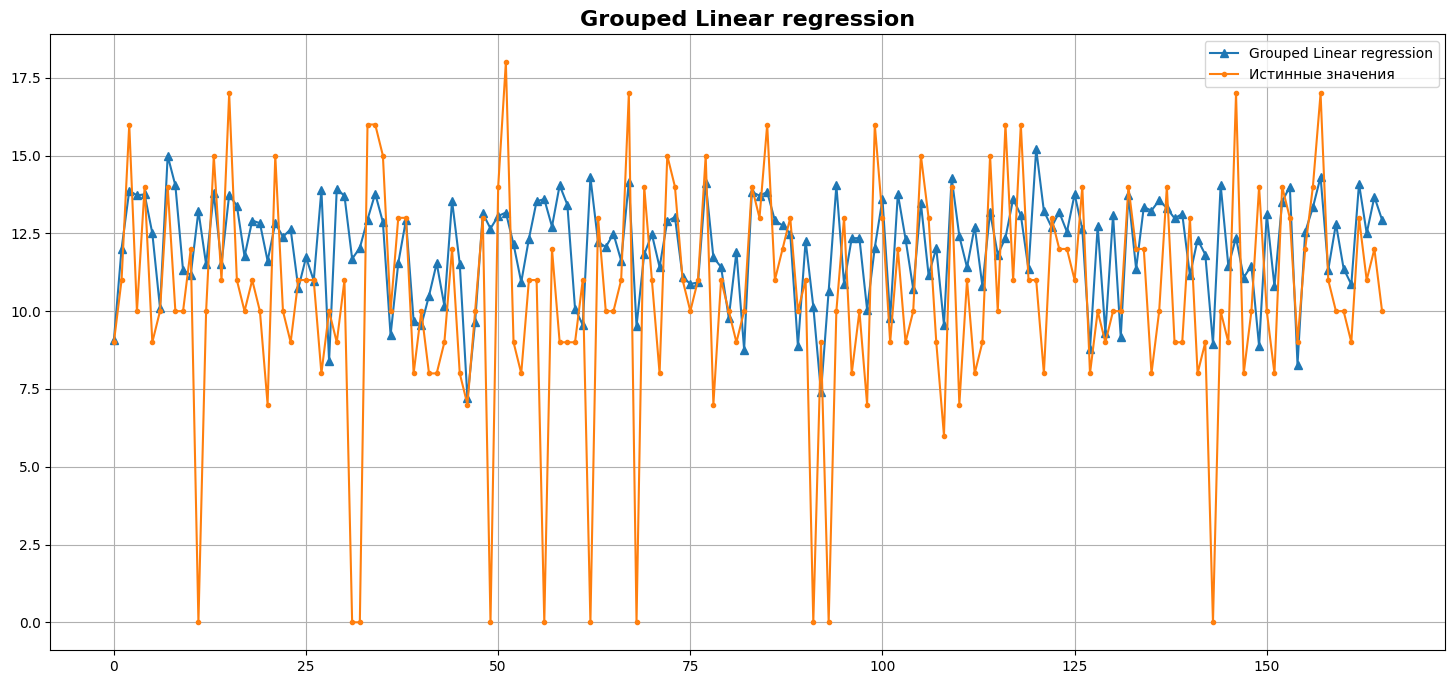

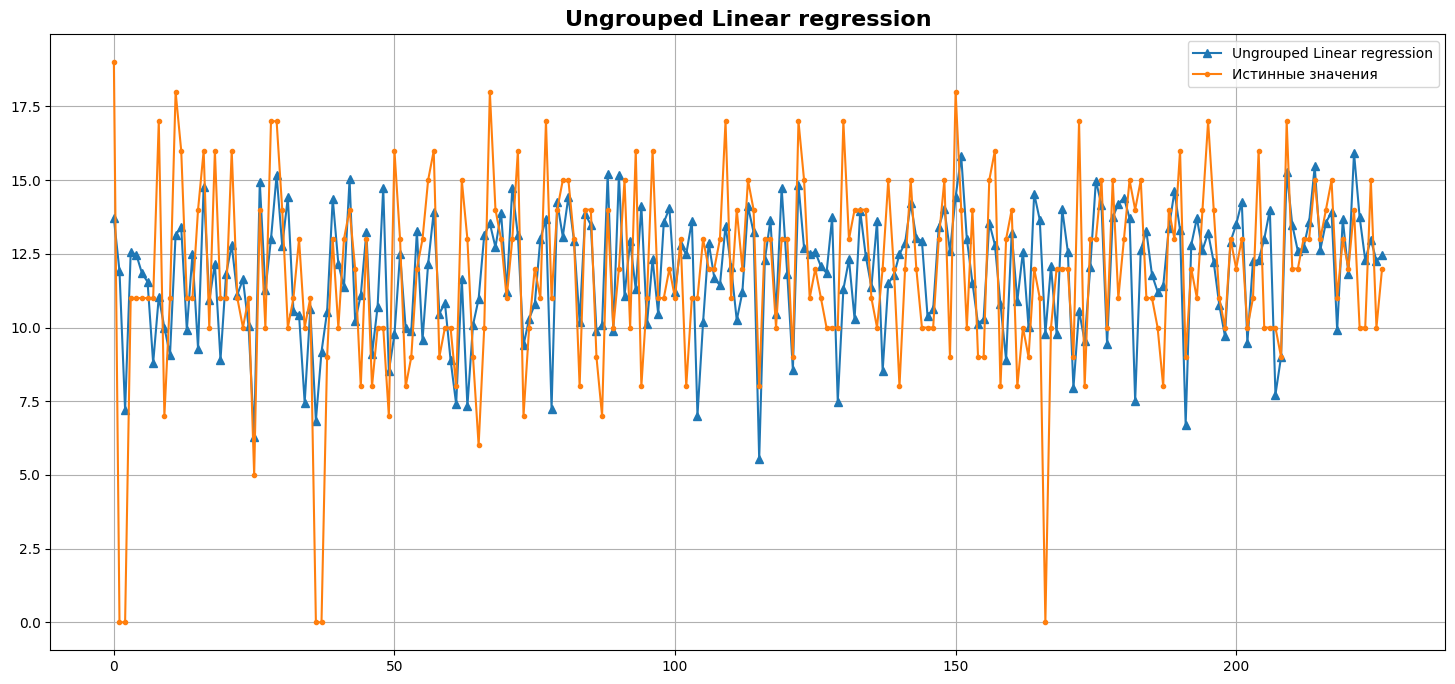

In [923]:
def run_lin_reg(folded):
    pipeline = Pipeline([("scaler", RobustScaler()), ("model", LinearRegression())])
    pipeline.fit(X.iloc[folded[1][0]], y.iloc[folded[1][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics


pipeline, predicted, true_values, metrics = run_lin_reg(grouped_fold)

best_r2 = (metrics, (predicted, true_values))

print_metrics(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], "Grouped Linear regression")

predicted_lin_reg = [best_r2[1][0]]
lin_reg_metric_params = [(best_r2[0]["r2"], pipeline)]

pipeline, predicted, true_values, metrics = run_lin_reg(ungrouped_fold)

best_r2 = (metrics, (predicted, true_values))

print_metrics(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], "Ungrouped Linear regression")

predicted_lin_reg.append(best_r2[1][0])
lin_reg_metric_params.append((best_r2[0]["r2"], pipeline))

## SVM

Metrics:
	 MSE: 9.613538
	 RMSE: 3.100571
	 MAE: 1.899851
	 R^2: 0.269784
Metrics:
	 MSE: 6.292195
	 RMSE: 2.508425
	 MAE: 1.738943
	 R^2: 0.374169


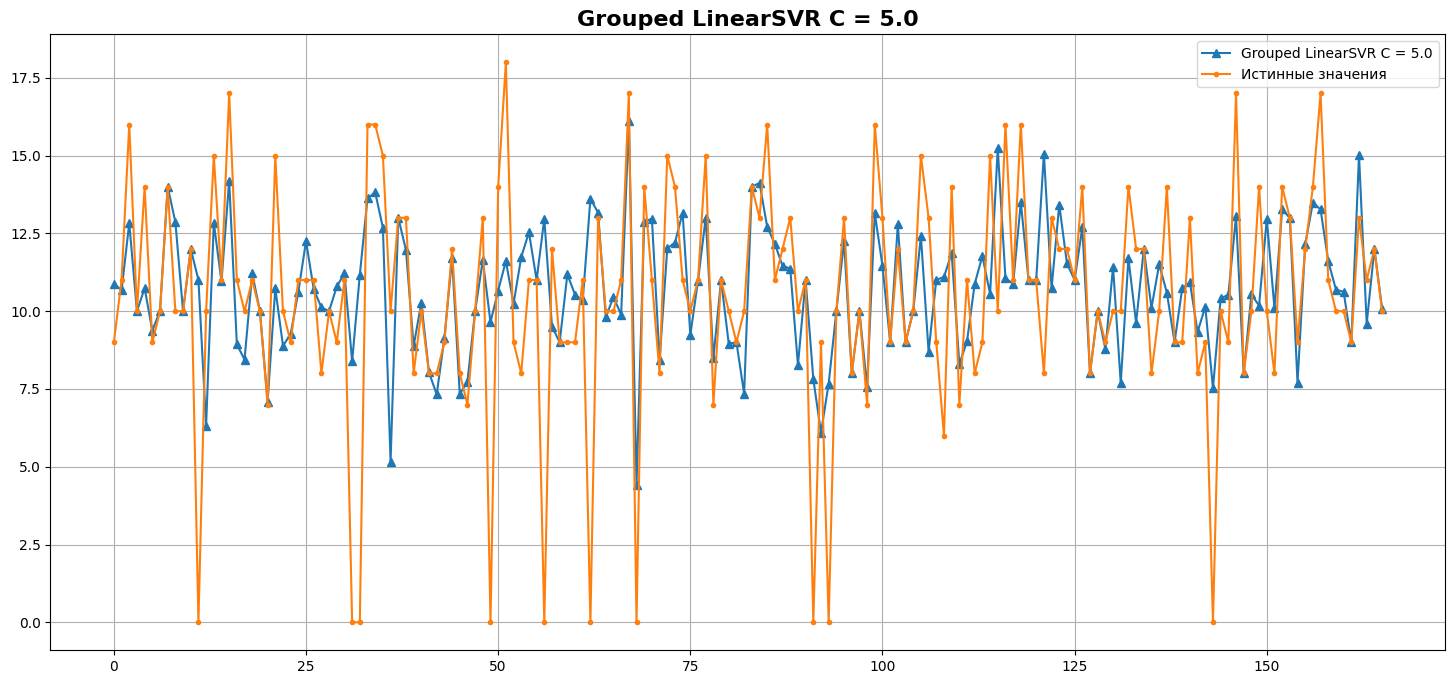

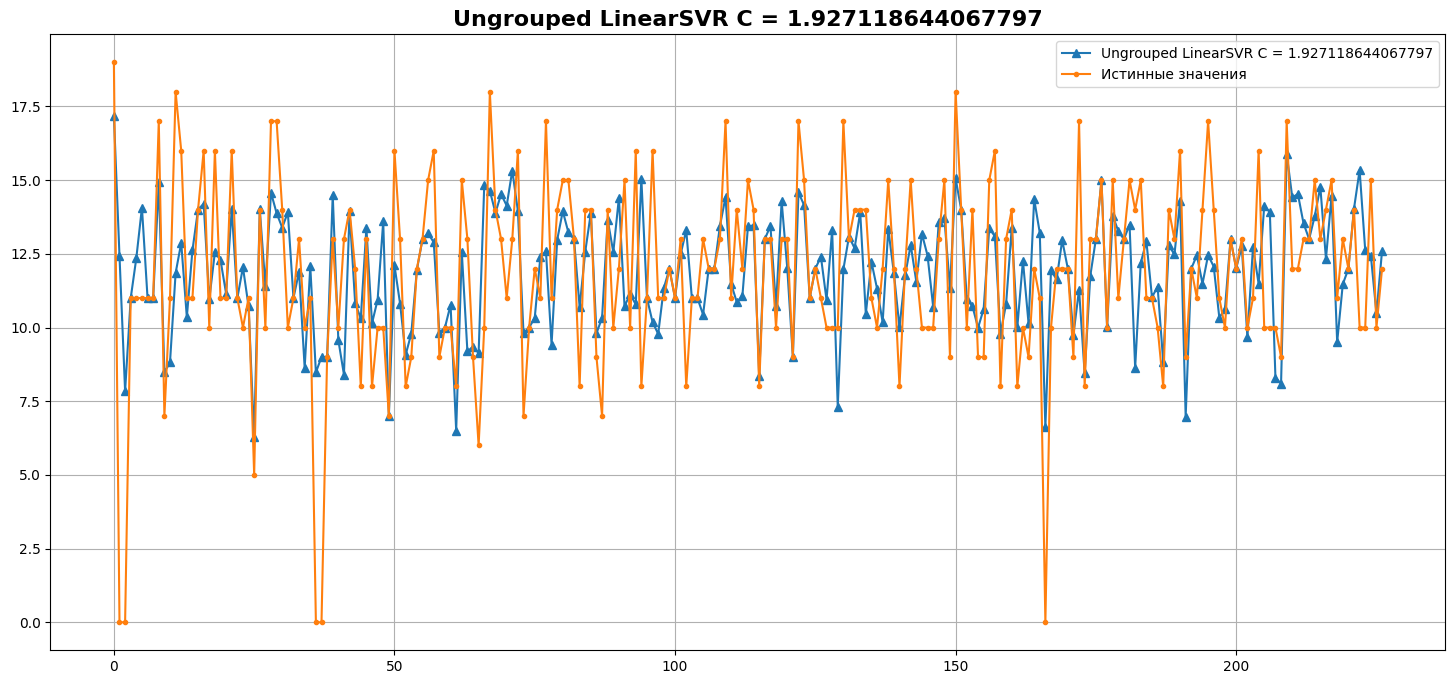

In [924]:
def run_svm(folded, C):
    pipeline = Pipeline(
        [("scaler", RobustScaler()), ("model", LinearSVR(C=C, max_iter=10000))]
    )
    pipeline.fit(X.iloc[folded[0][0]], y.iloc[folded[0][0]])
    predicted = pipeline.predict(X.iloc[folded[1][1]])
    true_values = y.iloc[folded[1][1]]
    metrics = get_metrics(true_values, predicted)
    return pipeline, predicted, true_values, metrics


best_r2 = None
for C in np.linspace(0.1, 5, 60):
    pipeline, predicted, true_values, metrics = run_svm(grouped_fold, C=C)

    if best_r2 is None or metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, C))

print_metrics(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Grouped LinearSVR C = {best_r2[1][2]}")

predicted_svm = [best_r2[1][0]]
svm_metric_params = [(best_r2[0]["r2"], pipeline)]

for C in np.linspace(0.1, 5, 60):
    pipeline, predicted, true_values, metrics = run_svm(ungrouped_fold, C=C)

    if best_r2 is None or metrics["r2"] > best_r2[0]["r2"]:
        best_r2 = (metrics, (predicted, true_values, C))

print_metrics(best_r2[0])
visualize(best_r2[1][1], best_r2[1][0], f"Ungrouped LinearSVR C = {best_r2[1][2]}")

predicted_svm.append(best_r2[1][0])
svm_metric_params.append((best_r2[0]["r2"], pipeline))

## Постройте сложную модель на основе предыдущих четырех простых и оцените ее точность

Вариант 1. Нужно взвесить предсказания простых моделей. Предложите метод взвешивания.

Metrics:
	 MSE: 7.263288
	 RMSE: 2.695049
	 MAE: 2.011593
	 R^2: 0.277583


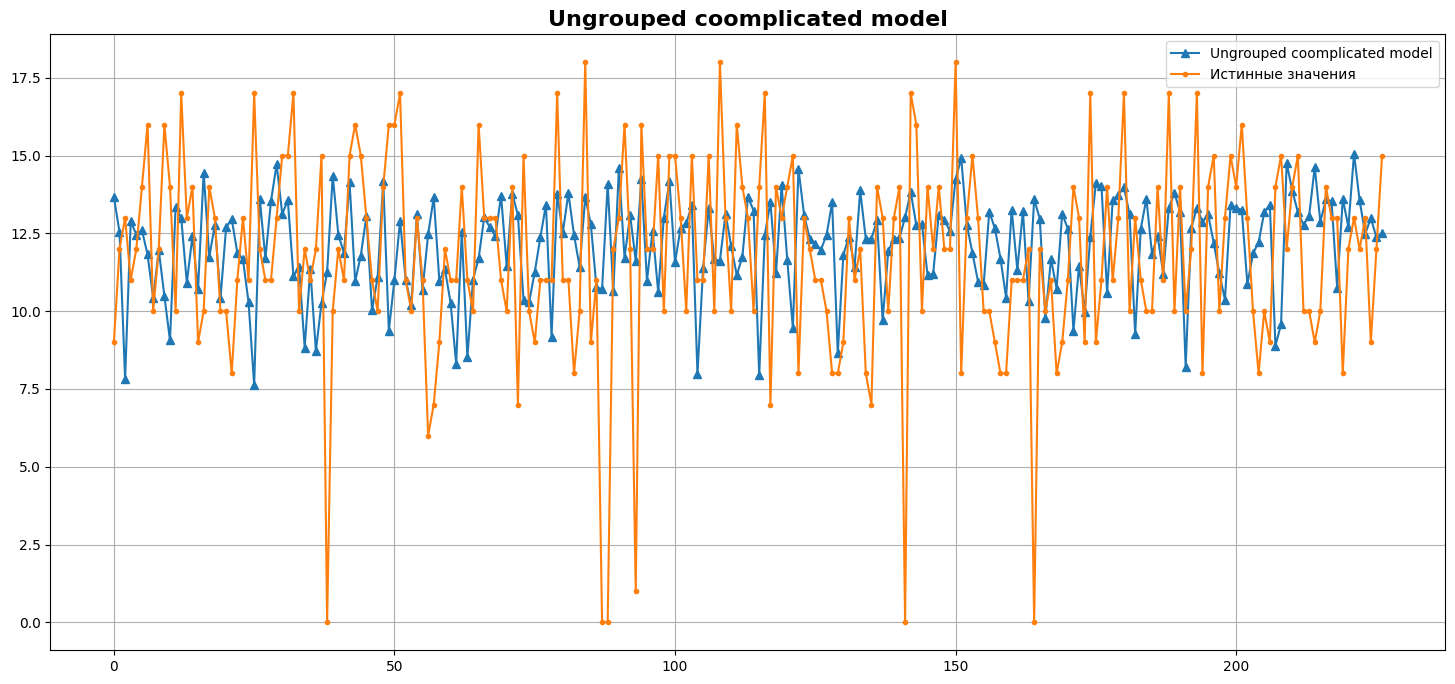

In [925]:
def create_ensemble_model(models_r2_pipelines):
    estimators = [
        ("knn", models_r2_pipelines["knn"][1]),
        ("bss", models_r2_pipelines["bss"][1]),
        ("lin_reg", models_r2_pipelines["lin_reg"][1]),
        ("svm", models_r2_pipelines["svm"][1]),
    ]
    weights = [
        models_r2_pipelines["knn"][0],
        models_r2_pipelines["bss"][0],
        models_r2_pipelines["lin_reg"][0],
        models_r2_pipelines["svm"][0],
    ]
    pipeline = Pipeline(
        [("model", VotingRegressor(estimators=estimators, weights=weights))]
    )
    return pipeline


compl_model_ungrouped = create_ensemble_model(
    {
        "knn": knn_metric_params[1],
        "bss": bss_metric_params[1],
        "lin_reg": lin_reg_metric_params[1],
        "svm": svm_metric_params[1],
    }
)
compl_model_ungrouped.fit(X.iloc[ungrouped_fold[1][0]], y.iloc[ungrouped_fold[1][0]])
pred = compl_model_ungrouped.predict(X.iloc[ungrouped_fold[1][1]])

print_metrics(get_metrics(y.iloc[ungrouped_fold[1][1]], pred))
visualize(y.iloc[ungrouped_fold[0][1]], pred, "Ungrouped coomplicated model")

Вариант 2. Нужно оценить корреляцию предсказаний простых моделей.

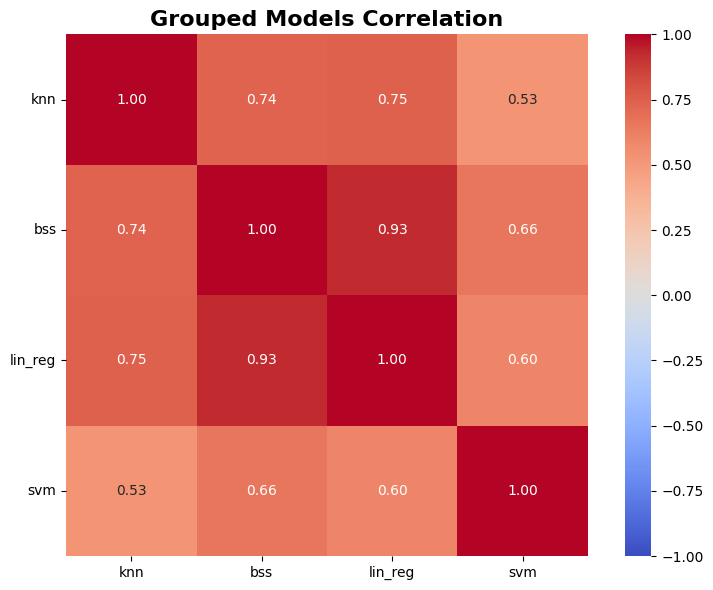

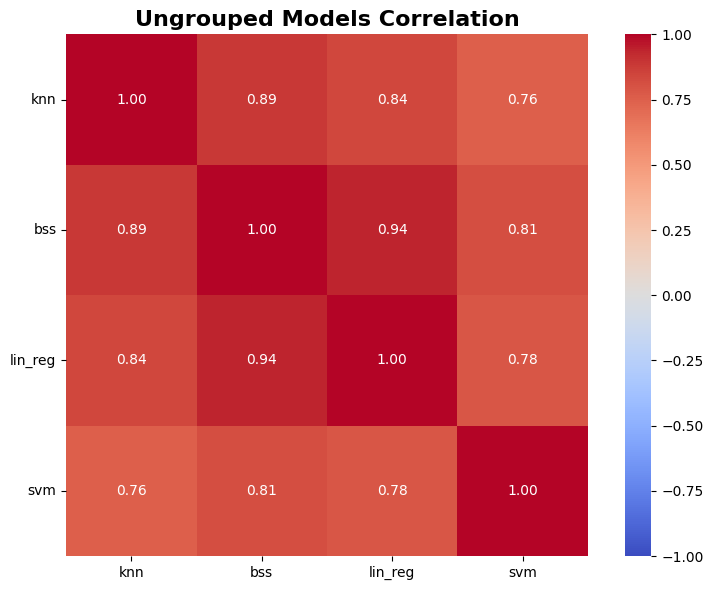

In [926]:
# Матрица корреляций для Grouped
plt.figure(figsize=(8, 6))
simple_models_grouped = pd.DataFrame(
    {
        "knn": predicted_knn[0],
        "bss": predicted_bss[0],
        "lin_reg": predicted_lin_reg[0],
        "svm": predicted_svm[0],
    }
)
sns.heatmap(
    simple_models_grouped.corr(),
    vmin=-1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
)
plt.title("Grouped Models Correlation", fontsize=16, fontweight="bold")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Матрица корреляций для Ungrouped
plt.figure(figsize=(8, 6))
simple_models_ungrouped = pd.DataFrame(
    {
        "knn": predicted_knn[1],
        "bss": predicted_bss[1],
        "lin_reg": predicted_lin_reg[1],
        "svm": predicted_svm[1],
    }
)
sns.heatmap(
    simple_models_ungrouped.corr(),
    vmin=-1,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
)
plt.title("Ungrouped Models Correlation", fontsize=16, fontweight="bold")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Сделайте итоговое предсказание

Решением домашнего задания является данный ноутбук + .csv файл с предсказанием. Пример формата файла, который должен у вас получится приведен в ```data/sample_submission.csv```. Данные для предсказания - ```X_test.csv```.

Значения предсказаний должны быть целочисленными. Проверка будет точности решения будет по MSE.

In [927]:
X_test = pd.read_csv("X_test.csv")

wrong_vals = {}
for column, valid_values in valid_ranges.items():
    if column in X_test.columns:
        if callable(valid_values):
            mask = ~X_test[column].apply(valid_values)
        else:
            mask = ~X_test[column].isin(valid_values)
        wrong_vals[column] = (mask | X_test[column].isna()).sum()

wrong_vals = pd.DataFrame({"incorrect_values": wrong_vals})
print(
    wrong_vals.sort_values("incorrect_values", ascending=False)[
        wrong_vals["incorrect_values"] != 0
    ]
)
with_compl = X_test.drop(["Walc", "Medu", "address", "higher"], axis=1)
print(with_compl.columns)

X_base = X_test.copy()

l_bin = LabelBinarizer()
l_enc = LabelEncoder()

X_base["school"] = l_bin.fit_transform(X_base["school"])
X_base["sex"] = l_bin.fit_transform(X_base["sex"])
X_base["famsize"] = l_bin.fit_transform(X_base["famsize"])
X_base["Pstatus"] = l_bin.fit_transform(X_base["Pstatus"])
X_base["schoolsup"] = l_bin.fit_transform(X_base["schoolsup"])
X_base["famsup"] = l_bin.fit_transform(X_base["famsup"])
X_base["paid"] = l_bin.fit_transform(X_base["paid"])
X_base["activities"] = l_bin.fit_transform(X_base["activities"])
X_base["nursery"] = l_bin.fit_transform(X_base["nursery"])
X_base["internet"] = l_bin.fit_transform(X_base["internet"])
X_base["romantic"] = l_bin.fit_transform(X_base["romantic"])
X_base["Mjob"] = l_enc.fit_transform(X_base["Mjob"])
X_base["Fjob"] = l_enc.fit_transform(X_base["Fjob"])
X_base["reason"] = l_enc.fit_transform(X_base["reason"])
X_base["guardian"] = l_enc.fit_transform(X_base["guardian"])
X_base["address"] = l_bin.fit_transform(X_base["address"])
X_base["higher"] = l_bin.fit_transform(X_base["higher"])


X_base["family_edu_potential"] = (
    X_base["Medu"]  # Произведение образования родителей
    * X_base["Fedu"]
    * (X_base["Mjob"] + 1)  # Произведение работы родителей
    * (X_base["Fjob"] + 1)
)
X_base["family_edu_potential"] = (
    X_base["family_edu_potential"] / X_base["family_edu_potential"].max()
)

X_base["study_discipline_index"] = (
    X_base["studytime"] ** 2  # Квадрат времени учебы (нелинейность)
    / (X_base["absences"] + 1)  # Учет пропусков (+1 чтобы избежать деления на 0)
    * (1 / (X_base["failures"] + 1))  # Обратная зависимость от неудач
    * X_base["goout"].apply(
        lambda x: 1 / (x + 0.5)
    )  # Обратная зависимость от времени с друзьями
)

X_base["study_social_balance"] = (
    np.log1p(X_base["studytime"] * X_base["famrel"])  # Учеба и семейные отношения
    - np.sqrt(X_base["goout"] * X_base["Dalc"])  # Социальная активность и алкоголь
    + X_base["activities"]  # Внеучебная активность
)

categorical_columns = X_base.select_dtypes(include=["object"]).columns
binary_mappings = {}

for col in categorical_columns:
    unique_values = sorted(X_base[col].unique())
    if len(unique_values) == 2:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        X_base[col] = X_base[col].map(mapping)
        binary_mappings[col] = mapping
        print(f" {col}: {mapping}")

label_encoders = {}
other_categorical = [col for col in categorical_columns if col not in binary_mappings]

for col in other_categorical:
    le = LabelEncoder()
    X_base[col] = le.fit_transform(X_base[col].astype(str))
    label_encoders[col] = le

Empty DataFrame
Columns: [incorrect_values]
Index: []
Index(['school', 'sex', 'age', 'famsize', 'Pstatus', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health',
       'absences'],
      dtype='object')


C:\Users\MrWh1teF0x\AppData\Local\Temp\ipykernel_25432\453444246.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wrong_vals.sort_values("incorrect_values", ascending=False)[


In [928]:
submission = pd.read_csv("sample_submission.csv", index_col="id")
pred = compl_model_ungrouped.predict(X_base)
submission["id"] = np.arange(len(pred))
submission["G3"] = pred.round(0).astype(int)
submission.to_csv("submission.csv", index=False)

# Часть 6. Состязательная валидация (Adversarial Validation)

Данная стратегия часто применяется в соревнованиях по машинному обучению. Так как проверить свой алгоритм возможно только на заданном тренировочном наборе данных, а результат требуется к набору, для которого нет ответов, то выбирают следующий подход:
- оценить степень схожести тренировочных и тестовых данных;
- составить валидацию из тех тренировочных данных, которые больше похожи на тестовые.

Алгоритм реализации AV:
1. Удаляем ответы из тренировочных данных.
2. Добавляем специальные метки (```is_test```) для классов: тренировочные данные и тестовые.
То есть у тестовых данных будет значение ```is_test = 1```, а у тренировочных ```is_test = 0```.
4. Учим алгоритм классификации предсказывать заданную метку ```is_test```.
5. Делим тренировочные данные на N частей и проводим кросс-валидацию.

Обучаем N алгоритмов классификации: каждый обучается на всех тестовых данных и на N-1 наборах тренировочных. Предсказываем на 1 тренировочном наборе.

6. Для каждого элемента в выборке предсказываем вероятность принадлежности класса и сортируем тренировочные данные по вероятности принадлежности тестовой выборке.
7. Выделяем заданное число данных в валидацию.
8. Обучаемся для итогового предсказания на всех данных.
9. Смотрим метрики AUC-ROC

Размеры Test dataset: (195, 33)
Размеры Train dataset: (454, 33)
Размеры объединенного датасета: (649, 34)
test samples: 195
train samples: 454


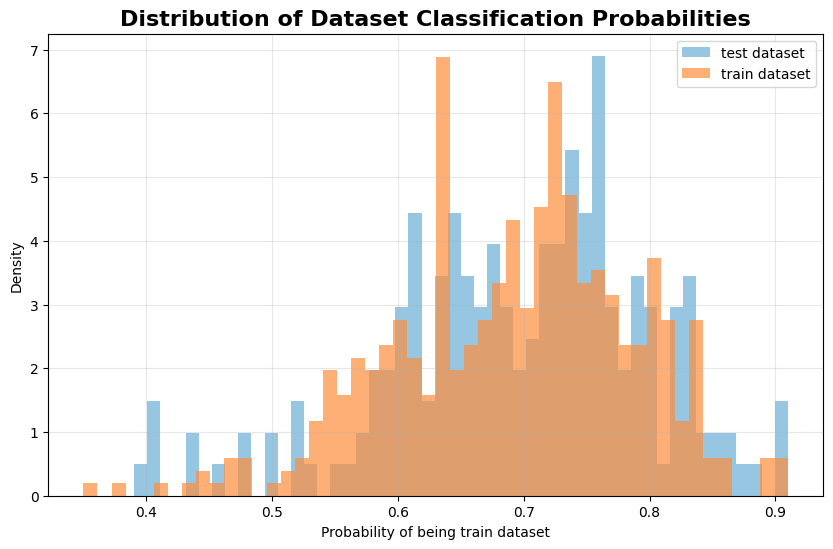

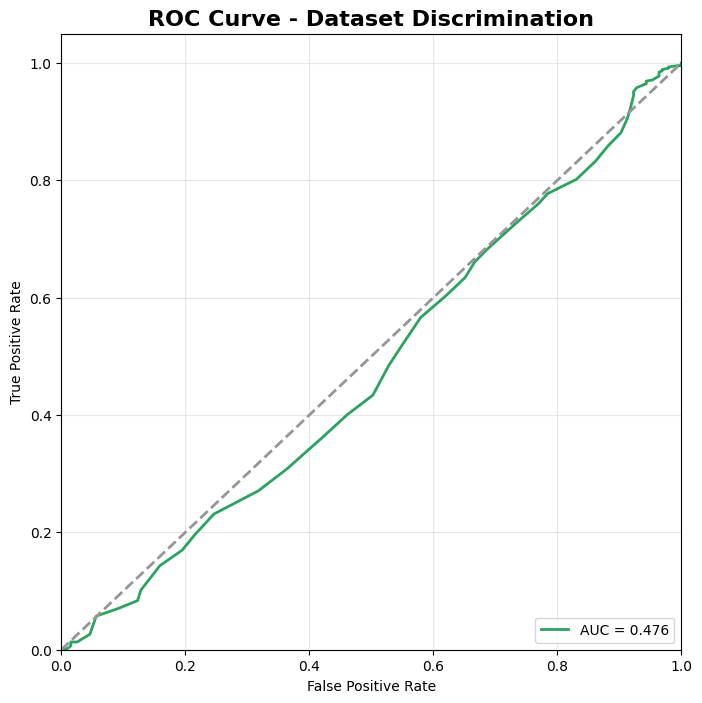

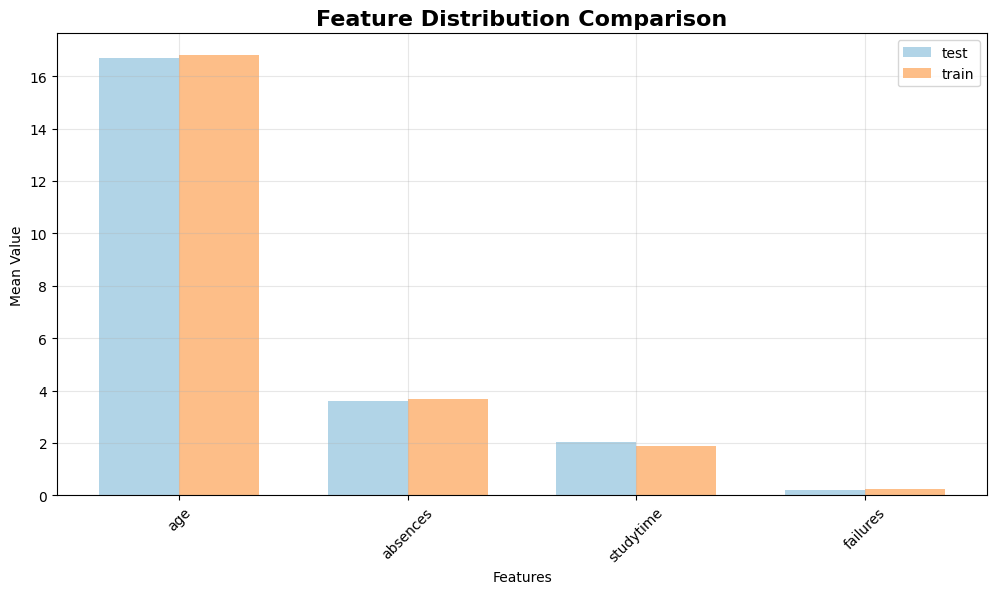

C:\Users\MrWh1teF0x\AppData\Local\Temp\ipykernel_25432\753379768.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


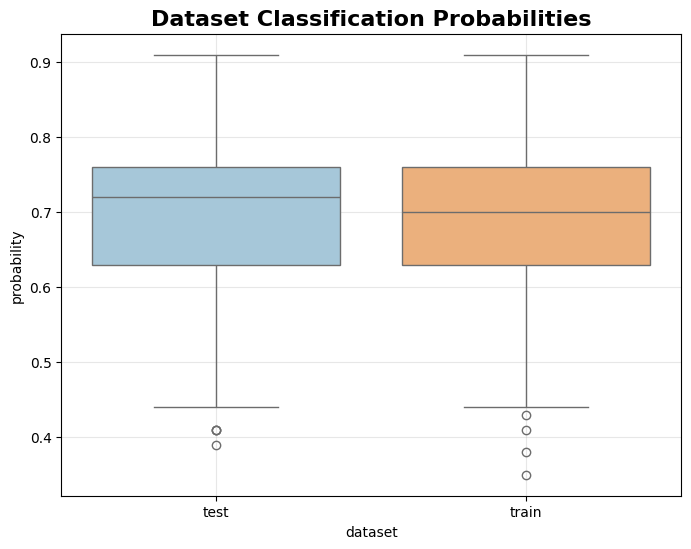

AUC-ROC Score: 0.48


In [929]:
df_test = X_base
df_train = X
print(f"Размеры Test dataset: {df_test.shape}")
print(f"Размеры Train dataset: {df_train.shape}")


def preprocess_data(df):
    df_processed = df.copy()
    categorical_columns = df_processed.select_dtypes(include=["object"]).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    return df_processed


test_processed = preprocess_data(df_test)
train_processed = preprocess_data(df_train)
common_columns = test_processed.columns.intersection(train_processed.columns)
test_processed = test_processed[common_columns]
train_processed = train_processed[common_columns]

test_processed["dataset"] = 0
train_processed["dataset"] = 1
combined_data = pd.concat([test_processed, train_processed], ignore_index=True)
y_combined = combined_data["dataset"]
X_combined = combined_data.drop("dataset", axis=1)
print(f"Размеры объединенного датасета: {combined_data.shape}")
print(f"test samples: {len(test_processed)}")
print(f"train samples: {len(train_processed)}")

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dataset_proba = cross_val_predict(
    model, X_combined, y_combined, cv=cv, method="predict_proba", n_jobs=-1
)

train_proba = dataset_proba[:, 1]
test_proba = train_proba[: len(test_processed)]
train_proba_values = train_proba[len(test_processed) :]
fpr, tpr, _ = roc_curve(y_combined, train_proba)
auc_score = roc_auc_score(y_combined, train_proba)

# График 1: Распределение вероятностей
plt.figure(figsize=(10, 6))
plt.hist(
    test_proba, bins=50, label="test dataset", color="#6baed6", density=True, alpha=0.7
)
plt.hist(
    train_proba_values,
    bins=50,
    label="train dataset",
    color="#fd8d3c",
    density=True,
    alpha=0.7,
)
plt.xlabel("Probability of being train dataset")
plt.ylabel("Density")
plt.title(
    "Distribution of Dataset Classification Probabilities",
    fontsize=16,
    fontweight="bold",
)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# График 2: ROC-кривая
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color="#2ca25f", lw=2, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], color="#969696", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(
    "ROC Curve - Dataset Discrimination",
    fontsize=16,
    fontweight="bold",
)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# График 3: Сравнение важных признаков
plt.figure(figsize=(12, 6))
important_features = ["age", "absences", "G1", "G2", "G3", "studytime", "failures"]
feature_comparison = []
for feature in important_features:
    if feature in df_test.columns and feature in df_train.columns:
        test_mean = df_test[feature].mean()
        train_mean = df_train[feature].mean()
        feature_comparison.append(
            {
                "feature": feature,
                "test": test_mean,
                "train": train_mean,
                "difference": abs(test_mean - train_mean),
            }
        )
feature_df = pd.DataFrame(feature_comparison)
x = np.arange(len(feature_df))
width = 0.35
plt.bar(
    x - width / 2, feature_df["test"], width, label="test", color="#9ecae1", alpha=0.8
)
plt.bar(
    x + width / 2, feature_df["train"], width, label="train", color="#fdae6b", alpha=0.8
)
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.title(
    "Feature Distribution Comparison",
    fontsize=16,
    fontweight="bold",
)
plt.xticks(x, feature_df["feature"], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# График 4: Boxplot вероятностей
plt.figure(figsize=(8, 6))
prob_data = pd.DataFrame(
    {
        "dataset": ["test"] * len(test_proba) + ["train"] * len(train_proba_values),
        "probability": np.concatenate([test_proba, train_proba_values]),
    }
)
sns.boxplot(
    x="dataset", y="probability", data=prob_data, palette=["#9ecae1", "#fdae6b"]
)
plt.title(
    "Dataset Classification Probabilities",
    fontsize=16,
    fontweight="bold",
)
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC-ROC Score: {auc_score:.2f}")

#### Так как AUC-ROC = 0.47, то отсюда можно сделать вывод, что датасеты очень похожи по распределениям. test и train студенты имеют схожие характеристики.
